## AIML CA2 PART B - UNSUPERVISED LEARNING

Objective : Use unsupervised learning to perform customer segmentation and identify distinct customer clusters based on age, gender, income, and spending patterns. This is to describe the characteristics of each customer cluster and determine the most valuable group of customers for the shopping mall, enabling the mall to take proactive measures to retain this group of customers.

Background Information : You are running a shopping mall, and you have some data about your customers like Age, Gender, Income and Spending, stored in <b>Customer_Dataset.csv</b>.

### IMPORTING DATASETS

1. Import numpy, pandas, plotly, seaborn, sklearn and other relevant modules required.

2. Read the csv data file 'Customer_Dataset.csv' using pd.read_csv.

In [1]:
# Importing the relevant modules and libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Importing the sklearn and clustering libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering, MeanShift, KMeans, DBSCAN, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from kneed import KneeLocator
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

# Removing and Filtering Warning Messages
import warnings
warnings.filterwarnings("ignore")

# Load the dataset using pandas
customer_df = pd.read_csv('Datasets/Customer_Dataset.csv')

### OVERVIEW AND LOADING OF THE CUSTOMER DATASET

Obtain an summarised view of the dataset by using pandas functions .info() to get summarized information of the dataset, and use .head() to display the first 5 rows of the dataset.

In [2]:
# Viewing of the customer_df.csv
print("Overview and Summary of Customer_Dataset.csv : \n")
print("Number of datapoints :", len(customer_df), "\n")
print(customer_df.info())

# Obtain the first 5 rows of the dataset
customer_df.head()

Overview and Summary of Customer_Dataset.csv : 

Number of datapoints : 200 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerID           200 non-null    int64 
 1   Gender               200 non-null    object
 2   Age                  200 non-null    int64 
 3   Income (k$)          200 non-null    int64 
 4   How Much They Spend  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,CustomerID,Gender,Age,Income (k$),How Much They Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### INITIAL ANALYSIS FROM THE OVERVIEW OF THE DATASET
- There are no missing values in the customer dataset, hence data cleaning is not needed.
- There are 200 rows of data points in the customer dataset.
- 'Gender' is a categorical feature in the dataset with an object datatype, while the rest have integer datatypes.

### WRANGLING OF THE CUSTOMER DATASET

In [3]:
# Wrangling of the dataset

# Renaming the last column for capitalisation standardisation
customer_df = customer_df.rename(columns = {"How Much They Spend" : "Spending Score (1-100)"})

# View the first 5 rows of the updated dataset
customer_df.head()

,CustomerID,Gender,Age,Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### DESCRIBING THE INFORMATION OF THE CUSTOMER DATASET

- Determine the number of rows and columns in the dataset : use shape[0] for rows and shape[1] for columns.

- Ensure the dataset does not contain NA values : use .isnull().sum() to sum the NA values by column (if any). If values are returned as 0, it indicates that there are no NA values.

- Retrieve the number of unique values for each column in the dataset using nunique().

- Obtain numerical summaries for numerical columns in the dataset by using .describe() and retrieve its statistical values.

In [4]:
# Information of the dataset

# Extracting the rows and columns of the dataset
print(f"\nThere are {customer_df.shape[0]} rows and {customer_df.shape[1]} columns in the customer_df dataset.")

# Check for any missing values
print(f"\nChecking for missing or na values in the dataset:\n---------------------------\n{customer_df.isnull().sum()}")

# Extract the unique values from each column of the dataset
print(f"\nCount of unique values in the dataset columns:\n---------------------------\n{customer_df.nunique()}")

# Describing the dataset with numerical summaries
print(f"\nSummarising the numerical values in the dataset:\n---------------------------\n{customer_df.drop(columns=['CustomerID', 'Gender']).describe()}")


There are 200 rows and 5 columns in the customer_df dataset.

Checking for missing or na values in the dataset:
---------------------------
CustomerID                0
Gender                    0
Age                       0
Income (k$)               0
Spending Score (1-100)    0
dtype: int64

Count of unique values in the dataset columns:
---------------------------
CustomerID                200
Gender                      2
Age                        51
Income (k$)                64
Spending Score (1-100)     84
dtype: int64

Summarising the numerical values in the dataset:
---------------------------
              Age  Income (k$)  Spending Score (1-100)
count  200.000000   200.000000              200.000000
mean    38.850000    60.560000               50.200000
std     13.969007    26.264721               25.823522
min     18.000000    15.000000                1.000000
25%     28.750000    41.500000               34.750000
50%     36.000000    61.500000               50.000000
75% 

### EXPLORATORY DATA ANALYSIS

### GRAPH 1 : INVESTIGATING  THE CORRELATION BETWEEN AGE, INCOME AND AMOUNT SPENT

- Age and Income: The correlation between age and income is extremely low of -0.012, suggesting that there is no strong linear relationship between these two factors. This indicates that age does not necessarily dictate higher or lower income levels.


- Income and Spending Score: The correlation between income and spending score is extremely low of 0.0099, indicating that there is a little association between a customer's income and their spending score. Hence, customers with higher incomes does not necessarily spend more, and vice-versa.


- Age and Amount Spent: The correlation between age and amount spent is surprisingly moderate at -0.33, implying that age may affect the spending score by customers. This makes sense, as people from different age groups may have varying spending habits, and we can see that as age increases, the amount spent generally decreases, indicating that young people tend to contribute more to the mall's income as their spending score is higher.

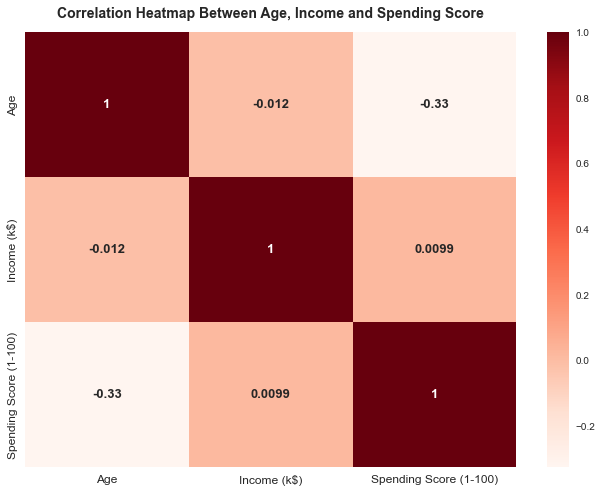

In [5]:
# Graph 1 : INVESTIGATING THE CORRELATION BETWEEN AGE, INCOME AND SPENDING SCORE

# Set the size for the plot
plt.figure(figsize=(11,8))

# Drop Customer_ID from the heatmap plot
corr_df = pd.DataFrame(customer_df).drop('CustomerID', axis=1)

# Calculate the correlation matrix
corr_matrix = corr_df.corr()

# Plotting the heatmap using seaborn library
sns.heatmap(corr_matrix, annot = True, cmap='Reds', annot_kws={"size": 13, "fontweight": "bold"})

# Plot customization
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation Heatmap Between Age, Income and Spending Score', fontsize=14, y=1.02, fontweight='bold')

# Display the plot
plt.show()

### GRAPH 2 : UNDERSTANDING PATTERNS AND DISTRIBUTIONS IN CUSTOMER VARIABLES

- Age and Income: The scatterplot between age and income reveals a diverse distribution, indicating that customers of various age groups exhibit different income levels. However, there is a lack of a linear correlation between age and income, indicating that age does not contribute to changing income levels.


- Age and Spending Score: The scatterplot between age and spending score highlights a varied spread, indicating that customers across different age groups have different spending behaviors. There is no clear linear relationship between age and spending, underlining the complexity of purchasing patterns.


- Income and Spending Score: The scatterplot between income and spending score also does not show a clear linear relationship, but instead shows distinct cluster group values, indicating that certain income levels correlate with specific amounts spent.


- Based on the histograms, we see that females typically have higher ages and spend more expenditure (higher spending score) at the mall compared to males due to the height of the histograms. Regarding distribution, it generally follows a normal distribution, with the exception of income for males, where it is shown to be skewed slightly to the right.

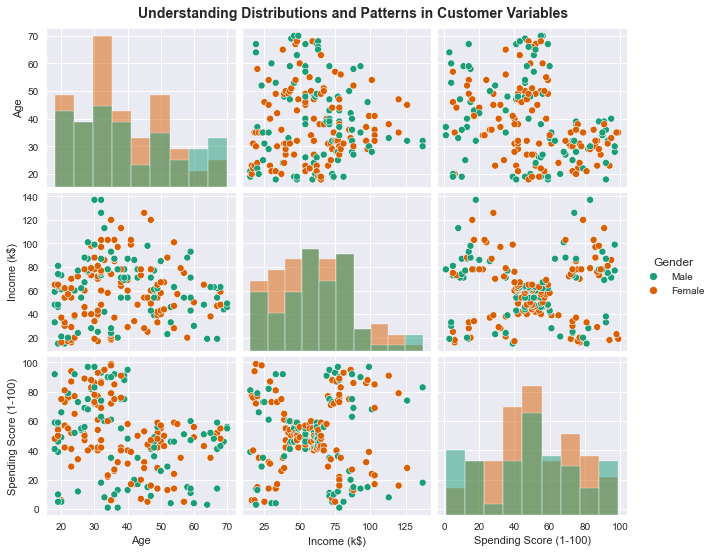

In [6]:
# Graph 2 : UNDERSTANDING PATTERNS AND DISTRIBUTIONS IN CUSTOMER VARIABLES

# Set the style and font for the plot
sns.set_style('darkgrid')

# Plot the pairplot
pairplot = sns.pairplot(customer_df.drop(columns='CustomerID'), hue='Gender', diag_kind='hist', aspect=1.2, palette='Dark2')

# Plot customization
plt.suptitle('Understanding Distributions and Patterns in Customer Variables', y=1.02, fontsize=14, fontweight='bold')

# Display the plot
plt.show()

### GRAPH 3 : ANALYZING THE DISTRIBUTION OF CUSTOMER INCOME AND SPENDING SCORE

- **Income by Gender**: The boxplot comparing income by gender reveals that the mean income for females is slightly lower than that for males. Females have a wider distribution of income, indicating a more diverse financial range and capabilities among female customers. Males, on the other hand, have a relatively narrower income distribution, possibly suggesting more consistent income levels among male customers.


- **Spending Score by Gender**: The boxplot analyzing spending score by gender demonstrates that the mean spending score for females is similar to that for males. However, the females generally have higher spending scores compared to males, indicating that females typically spend more than males. However, males have a wider distribution of spending scores, indicating that males have varied spending amounts and are less consistent to that of females.

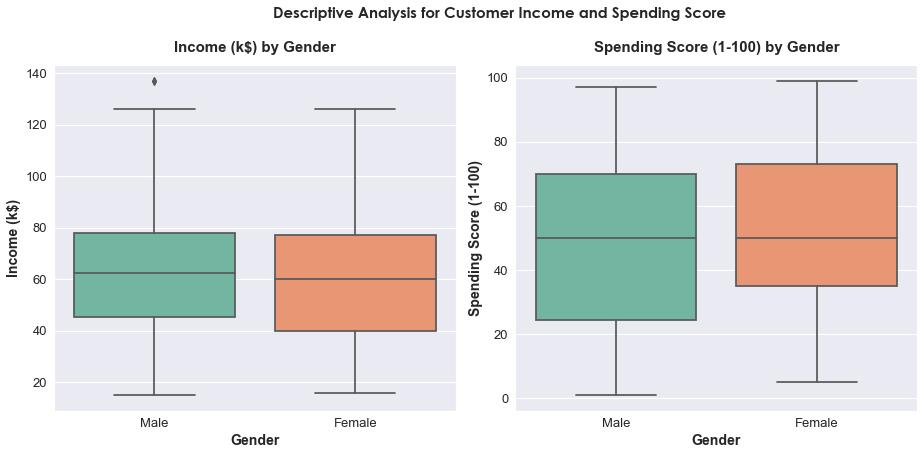

In [7]:
# Graph 3 : ANALYZING THE DISTRIBUTION OF CUSTOMER INCOME AND SPENDING SCORE

# Set the size of the plot
fig, axMany = plt.subplots(1, 2, figsize=(13, 6)) 

# Set the style for the plot
palette = sns.color_palette("Set2")
sns.set_style("darkgrid")

# Plot the boxplots for income by gender
sns.boxplot(x='Gender', y='Income (k$)', data=customer_df, ax=axMany[0], palette=palette)

# Set title and labels for the first boxplot
axMany[0].set_title('Income (k$) by Gender', fontsize=15, fontweight='bold', y=1.02)
axMany[0].set_xlabel('Gender', fontsize=14, fontweight='bold')
axMany[0].set_ylabel('Income (k$)', fontsize=14, fontweight='bold')

# Plot the boxplots for amount spent by gender
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=customer_df, ax=axMany[1], palette=palette)

# Set title and labels for the second boxplot
axMany[1].set_title('Spending Score (1-100) by Gender', fontsize=15, fontweight='bold', y=1.02)
axMany[1].set_xlabel('Gender', fontsize=14, fontweight='bold')
axMany[1].set_ylabel('Spending Score (1-100)', fontsize=14, fontweight='bold')

# Change the font size of axis labels and axis ticks
for ax in axMany:
    ax.tick_params(axis='both', which='major', labelsize=13)

# Create a compact view of the graphs
plt.tight_layout()
plt.rcParams['font.family'] = 'Century Gothic'
plt.suptitle("Descriptive Analysis for Customer Income and Spending Score", y=1.05, fontsize=15, x=0.54, fontweight='bold', ha='center')
plt.show()

### GRAPH 4 : ANALYZING THE COUNT OF CUSTOMERS BY GENDER

- The countplot shows that the number of female customers (112) is slightly higher than the number of male customers (88), indicating a relatively balanced gender distribution within the dataset. This balanced representation provides an opportunity for the mall to create inclusive marketing strategies that cater to the preferences and needs of both genders.


- The similar count of male and female customers suggests that the mall has the potential to appeal to a wide range of customers across genders. This provides a strong foundation for implementing gender-specific promotions, loyalty programs, and targeted advertising campaigns to engage and retain both male and female customers effectively.


- The relatively balanced gender distribution also further opens up opportunities for the mall to diversify its offerings and brands to attract a broader customer base to increase sales and income.

Number of Customers By Gender:
Female    112
Male       88
Name: Gender, dtype: int64


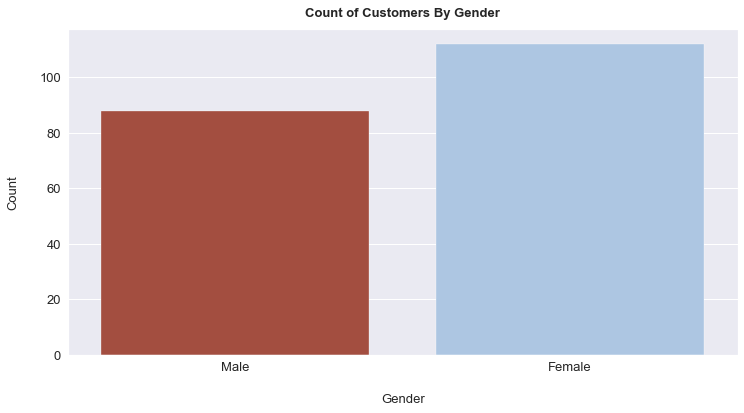

In [8]:
# Graph 4 : ANALYZING THE COUNT OF CUSTOMERS BY GENDER

# Set the style and font for the plot
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))

# Display count of gender
print(f"Number of Customers By Gender:\n{customer_df.Gender.value_counts()}")

# Visualise differences between male and female customer numbers
ax = sns.countplot(x='Gender', data=customer_df, palette=["#B34230", "#A4C6EB"])

# Plot customisation 
plt.xlabel('Gender', fontsize=13, labelpad=20)
plt.xticks(fontsize=13)
plt.ylabel('Count', fontsize=13, labelpad=20)
plt.yticks(fontsize=13)

plt.title('Count of Customers By Gender', y=1.02, fontsize=13, fontweight='bold')
plt.show()

### GRAPH 5 : VISUALIZING DISTRIBUTIONS FOR AGE, INCOME AND SPENDING SCORE OF CUSTOMERS

- Age Distribution: The histogram for age distribution reveals that the majority of customers are in their 20s to 40s, with a peak around the late 30s to early 40s. This suggests that the mall attracts a significant number of young and middle-aged customers. The distribution gradually decreases beyond the mid-40s, indicating a decrease in the number of older customers. This age distribution can guide the mall's marketing efforts by tailoring promotions and events to target the preferences and interests of different age groups.


- Income Distribution: The income distribution histogram shows that there is a relatively even spread of income levels among customers. The majority of customers fall within the income range of approximately 40,000 dollars to 80,000 dollars, with a peak around 60,000 dollars. This suggests that the mall caters to a diverse range of income groups, making it an attractive destination for both middle-income and higher-income individuals. The even income distribution presents opportunities for the mall to offer a mix of products and services that cater to various budget ranges.


- Spending Score Distribution: The histogram for spending scores demonstrates a wide range of spending behaviors among customers. While there is a cluster of customers who have moderate spending scores from 40 to 60, there are also segments with higher spending tendencies up to a spending score of 100 and lower spending scores of 20, indicating lower purchasing amounts. This distribution implies that the mall accommodates various types of shoppers, from those who prioritize budget-conscious purchases to those who are willing to spend more on shopping. Tailoring marketing strategies and offerings to these distinct spending patterns can enhance customer engagement and satisfaction.

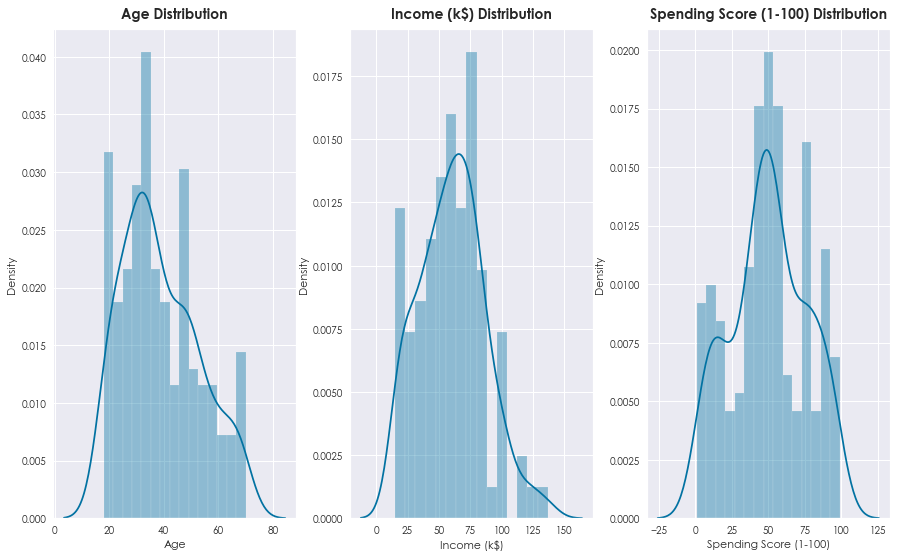

In [9]:
# Graph 6 : VISUALIZING DISTRIBUTIONS FOR AGE, INCOME AND SPENDING SCORES OF CUSTOMERS

# Set the style and font for the plot
sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'Century Gothic'

# Set the figure size for the plots
plt.figure(figsize = (15, 9))

# Let n = 1 for the subplot creation
n = 1

# Initialize a for loop to plot 3 subplots side-by-side containing histograms of numerical data
for x in ['Age' , 'Income (k$)' , 'Spending Score (1-100)']:
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.22)
    sns.distplot(customer_df[x], bins = 15)
    plt.title('{} Distribution'.format(x), fontsize=14, fontweight='bold', y=1.01)
    n += 1

# Display the plots
plt.show()

### FEATURE PROCESSING AND REPRESENTATION OF DATA


- Drop unused / unnecessary columns from the dataset, such as 'CustomerID', which would not be helpful  in the clustering evaluation.


- Use pandas to create dummy variables for categorical variables 'Gender' in the dataset, using the pandas 'get_dummies()' function , representing them as binary variables (0 or 1) to enable scaling and further pre-processing.


- View the first 5 rows of the dataset using .head().

In [10]:
# Feature Processing of the Dataset

# Create a copy of the original dataset
customer_df_final = customer_df.copy()

# Drop unnecessary columns from the dataset
customer_df_final.drop('CustomerID', axis=1, inplace = True)

# Using pandas function get_dummies for categorical variable conversion
customer_df_final = pd.get_dummies(customer_df_final, columns = ['Gender'], drop_first = True)

# Displaying the first 5 rows of the modified dataset
print("Customer_Df Dataset After Performing Categorical Encoding :")
customer_df_final.head()

Customer_Df Dataset After Performing Categorical Encoding :


,Age,Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


### SCALING AND NORMALIZING NUMERICAL FEATURES

To ensure uniformity and comparability among the numerical features in the dataset, the StandardScaler is applied for feature scaling. This scaler transforms the numerical features by subtracting the mean value and dividing by the standard deviation of each feature. This process standardizes the features, bringing them to a common scale with a mean of 0 and a standard deviation of 1.

By employing the StandardScaler, the numerical features are transformed into a standardized format, facilitating more accurate comparisons and analyses. This normalization ensures that the numerical variables are consistently scaled, helping to mitigate any potential bias that could arise from variations in the original scale of the features. This standardized representation enhances the reliability and interpretability of subsequent data analyses and modeling tasks.

Scaled Data Using Standard Scaler :

            0         1         2
0   -1.424569 -1.738999 -0.434801
1   -1.281035 -1.738999  1.195704
2   -1.352802 -1.700830 -1.715913
3   -1.137502 -1.700830  1.040418
4   -0.563369 -1.662660 -0.395980
..        ...       ...       ...
195 -0.276302  2.268791  1.118061
196  0.441365  2.497807 -0.861839
197 -0.491602  2.497807  0.923953
198 -0.491602  2.917671 -1.250054
199 -0.635135  2.917671  1.273347

[200 rows x 3 columns]


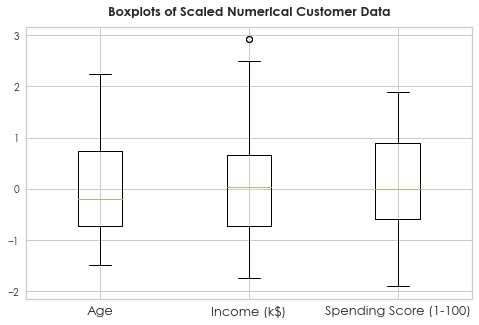

In [11]:
# Scaling the numerical features

# Use Standard Scaler to scale the numerical data
scaler = StandardScaler()
customer_df_scaled = pd.DataFrame(scaler.fit_transform(customer_df_final[['Age', 'Income (k$)', 'Spending Score (1-100)']]))

# Displaying transformed data
print(f"Scaled Data Using Standard Scaler :\n\n{customer_df_scaled}")

# Plot a boxplot to show the numerical data upon scaling using Standard Scaler

# Set the style and font for the plot
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Century Gothic'

# Set the figure size for the plot
plt.figure(figsize = (8, 5))

# Plotting the boxplot
plt.boxplot(customer_df_scaled)
labels = ['Age', 'Income (k$)', 'Spending Score (1-100)']

# Set the xticklabels to the column names
plt.xticks(range(1, len(labels) + 1), labels, fontsize=13)

plt.title("Boxplots of Scaled Numerical Customer Data", fontsize=13, fontweight='bold', y=1.02)
plt.show()

<b>OBTAINING A SUMMARIZED OVERVIEW OF THE SCALED DATAFRAME</b>

In [12]:
# View the first 5 rows of the dataset upon scaling
customer_df_scaled.head()

,0,1,2
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### BASELINE K-MEANS COMPARISON OF CLUSTERS WITH SCALED AND UNSCALED DATA

- Compare the silhouette scores and distinct quality of the clusters to justify if scaling is needed.
- From visual inspection of the data values, the magnitude of values do not differ significantly, hence scaling may not be needed in the case of this dataset.
- Based on the results, it is clear that the silhouette score (unscaled) provides more distinct clusters, and as seen from the plots, there is less overlap between the various clusters of customer groups.


- Since the clusters are more well-defined with higher overall silhouette scores without scaling the data, no scaling will be applied to this dataset.

Comparison of Silhouette Scores Between Scaled and Unscaled Data :
Silhouette Score (Scaled Data): 0.3502702043465398
Silhouette Score (Unscaled Data): 0.4052954330641215


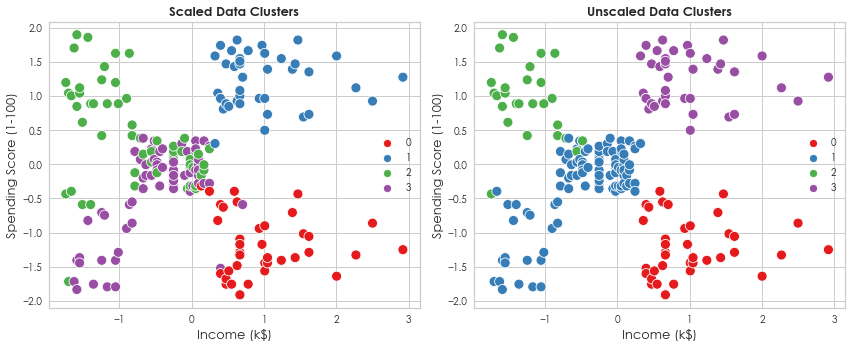

In [13]:
# Evaluating the clusters with scaled and unscaled data

# Baseline K-Means Model (Scaled)
customer_df_copy = customer_df_final.copy()
customer_df_copy[['Age', 'Income (k$)', 'Spending Score (1-100)']] = customer_df_scaled
baseline_kmeans = KMeans(n_clusters = 4, random_state=42)
scaled_labels = baseline_kmeans.fit_predict(customer_df_scaled)

# Baseline K-Means Model (Unscaled)
baseline_kmeans = KMeans(n_clusters = 4, random_state=42)
unscaled_labels = baseline_kmeans.fit_predict(customer_df_final)

# Evaluate the quality of clusters using Silhouette Score
silhouette_avg_scaled = silhouette_score(customer_df_copy, scaled_labels)
silhouette_avg_unscaled = silhouette_score(customer_df_final, unscaled_labels)

# Print Silhouette Scores
print("Comparison of Silhouette Scores Between Scaled and Unscaled Data :")
print("Silhouette Score (Scaled Data):", silhouette_avg_scaled)
print("Silhouette Score (Unscaled Data):", silhouette_avg_unscaled)

# Plot clusters side by side
plt.figure(figsize=(12, 5))

# Scaled Data Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=customer_df_copy['Income (k$)'], y=customer_df_copy['Spending Score (1-100)'], hue=scaled_labels, palette='Set1', s=100)
plt.title('Scaled Data Clusters', fontsize=13, fontweight='bold')
plt.xlabel('Income (k$)', fontsize=13)
plt.ylabel('Spending Score (1-100)', fontsize=13)

# Unscaled Data Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=customer_df_copy['Income (k$)'], y=customer_df_copy['Spending Score (1-100)'], hue=unscaled_labels, palette='Set1', s=100)
plt.title('Unscaled Data Clusters', fontsize=13, fontweight='bold')
plt.xlabel('Income (k$)', fontsize=13)
plt.ylabel('Spending Score (1-100)', fontsize=13)

plt.tight_layout()
plt.show()

### MODEL SELECTION : CHOOSING THE NUMBER OF CLUSTERS FOR CLUSTERING

To justify the optimal number of n_clusters, a variety of evaluation metrics like elbow plot, silhouette score, Davies Bouldin score and Calinski Harabasz score is required to ensure a comprehensive evaluation and ensure optimal results are obtained.

### <font color='blue'>CLUSTERING MODEL 1 : K-MEANS MODEL</font>

### DETERMINE THE OPTIMAL NUMBER OF CLUSTERS USING EVALUATION METRICS

To determine the optimal number of clusters for K-Means Clustering, evaluation metrics like silhouette score, Davies Bouldin score, and Calinski Harabasz score is utilized for analysis.

For each potential cluster configuration (ranging from 2 to 12 clusters), the following evaluation metrics are calculated:

- **Silhouette Score**: This score measures the closeness of data points in one cluster to other points in the same cluster compared to points in neighboring clusters. Higher values indicate better-defined clusters.


- **Davies-Bouldin Index**: This index quantifies the average similarity between each cluster and its most similar cluster. Lower values indicate better clustering.


- **Calinski-Harabasz Index**: Also known as the Variance Ratio Criterion, this index assesses the ratio of between-cluster dispersion to within-cluster dispersion. Higher values suggest more distinct clusters.

These metrics are computed for varying number of clusters, and the results are stored in a DataFrame 'kmeans_metrics' :


- The Silhouette Score subplot displays the silhouette coefficients for different cluster numbers. 
- The Davies-Bouldin Index subplot demonstrates the index's values against cluster counts. 
- The Calinski-Harabasz Index subplot illustrates how the index varies as the number of clusters changes.

Visualization of the Evaluation Metrics for K-Means Clustering:


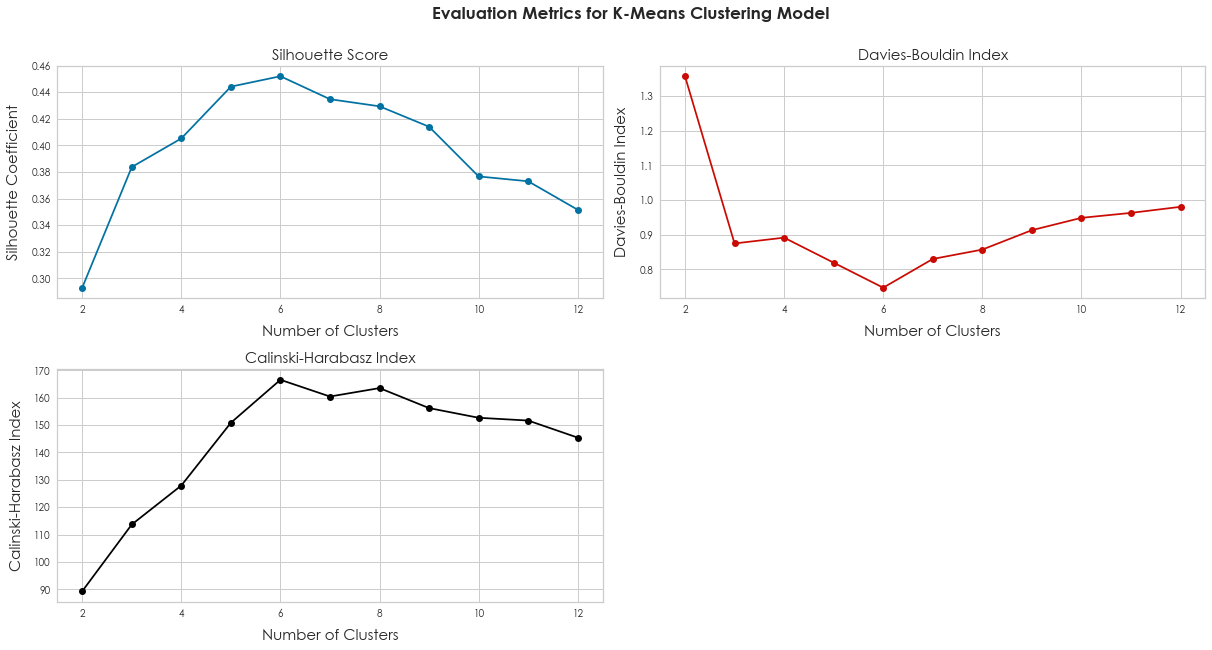

Coefficient Values of Evaluation Metrics for K-Means Clustering:


,Cluster Number,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
4,6,0.452055,0.747522,166.583496
3,5,0.444243,0.819643,150.871930
5,7,0.434798,0.830356,160.465605
6,8,0.429456,0.857379,163.547868
7,9,0.414095,0.913378,156.233192
2,4,0.405295,0.891819,127.924826
1,3,0.383799,0.875065,113.666644
8,10,0.376726,0.948958,152.693369
9,11,0.373078,0.963234,151.678173
10,12,0.351652,0.980742,145.432698


In [14]:
# Determining the number of clusters to use for evaluation and modelling

# Create a 2 by 2 subplot for displaying the plots
fig, axes = plt.subplots(2, 2, figsize=(17, 9))
fig.subplots_adjust(hspace=0.4)

# Set the style and font for the plot
sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'Century Gothic'

# Lists to store the metric scores for each cluster configuration
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Calculate metrics for varying number of clusters
for k in range(2, 13):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(customer_df_final)
    
    # Calculate and store metric scores
    silhouette_scores.append(silhouette_score(customer_df_final, labels))
    davies_bouldin_scores.append(davies_bouldin_score(customer_df_final, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(customer_df_final, labels))
    
# Create a DataFrame to store the metric scores
kmeans_metrics = {
    'Cluster Number': range(2,13),
    'Silhouette Score': silhouette_scores,
    'Davies-Bouldin Index': davies_bouldin_scores,
    'Calinski-Harabasz Index': calinski_harabasz_scores
}
kmeans_metrics = pd.DataFrame(kmeans_metrics)

# Plot the Silhouette Score
ax = axes[0, 0]
ax.plot(range(2,13), silhouette_scores, marker='o')
ax.set_title('Silhouette Score', fontsize=15)
ax.set_xlabel('Number of Clusters', fontsize=15, labelpad=10)
ax.set_ylabel('Silhouette Coefficient', fontsize=15, labelpad=10)

# Plot the Davies-Bouldin Index
ax = axes[0, 1]
ax.plot(range(2,13), davies_bouldin_scores, marker='o', color='r')
ax.set_title('Davies-Bouldin Index', fontsize=15)
ax.set_xlabel('Number of Clusters', fontsize=15, labelpad=10)
ax.set_ylabel('Davies-Bouldin Index', fontsize=15, labelpad=10)

# Plot the Calinski-Harabasz Index
ax = axes[1, 0]
ax.plot(range(2,13), calinski_harabasz_scores, marker='o', color='black')
ax.set_title('Calinski-Harabasz Index', fontsize=15)
ax.set_xlabel('Number of Clusters', fontsize=15, labelpad=10)
ax.set_ylabel('Calinski-Harabasz Index', fontsize=15, labelpad=10)

# Remove the fourth empty subplot
fig.delaxes(axes[1, 1])

# Add a super title
plt.suptitle('Evaluation Metrics for K-Means Clustering Model', fontsize=17, y=1.001, fontweight='bold', x=0.52)

# Adjust layout and display the plots
plt.tight_layout()
print("Visualization of the Evaluation Metrics for K-Means Clustering:")
plt.show()

# Displaying the evaluation metrics
print("Coefficient Values of Evaluation Metrics for K-Means Clustering:")
kmeans_metrics.sort_values(by='Silhouette Score', ascending=False)

### INSIGHTS GAINED FROM K-MEANS ANALYSIS

From the above analysis, we see that the cluster number with the highest silhouette score is 6 with a silhouette score of 0.452055, likely indicating that choosing 6 clusters is the most well-defined option. However, to further validate and compare our results, we will also be using an elbow plot below to evaluate the optimal number of clusters.

### USING AN ELBOW PLOT TO FURTHER VISUALIZE THE NUMBER OF CLUSTERS

To further select our optimal number of clusters for K-Means Clustering, we will use the elbow curve method which helps us identify a point on the curve where the rate of decrease in the distortion score (inertia) starts to slow down, resembling an "elbow" shape.

The following steps outline the process:

1. **Elbow Curve Plot**: We begin by visualizing the elbow curve to explore how the distortion score changes with different numbers of clusters. The distortion score measures the sum of squared distances between data points and their assigned cluster centers. As the number of clusters increases, the distortion score tends to decrease, reflecting improved clustering performance. However, there is a point where further increasing the number of clusters does not significantly reduce the distortion score.


2. **Optimal Cluster Number**: The "elbow point" on the curve represents the optimal number of clusters. It signifies the trade-off between achieving a lower distortion score and avoiding excessive complexity in the model. At this point, increasing the number of clusters provides diminishing returns in terms of improved clustering performance.

Based on the elbow plot obtained, we see that it recommends 5 clusters to be utilized instead, which does not align with the results of the silhouette score. Hence, more analysis of the clusters will be done to K-Means should this model be chosen for further analysis and tuning.

Elbow Curve to determine the number of clusters to be formed for K-Means Clustering:


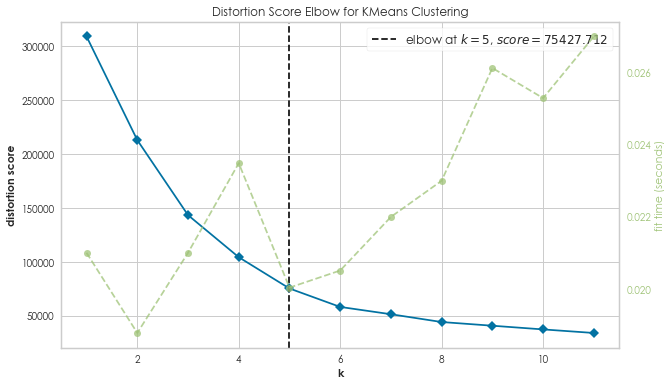

In [15]:
# Plot the elbow curve to identify the numbers of clusters to make

print('Elbow Curve to determine the number of clusters to be formed for K-Means Clustering:')

# Set the style and font for the plot
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Century Gothic'

# Set the figure size for the plot
plt.figure(figsize = (10, 6))

# Fitting the KElbowVisualizer to plot the elbow curve
elbow_curve = KElbowVisualizer(KMeans(n_clusters=k, n_init=10, random_state=42), k=(1, 12)).fit(customer_df_final)

# Plot customisation
elbow_curve.ax.set_xlabel('k', fontweight='bold')
elbow_curve.ax.set_ylabel('distortion score', fontweight='bold')

# Plot the elbow curve
elbow_curve.show()
plt.show()

### <font color='blue'>CLUSTERING MODEL 2 : AGGLOMERATIVE CLUSTERING MODEL</font>

### DETERMINE THE OPTIMAL NUMBER OF CLUSTERS USING EVALUATION METRICS

To determine the optimal number of clusters for AgglomerativeClustering Clustering, evaluation metrics like silhouette score, Davies Bouldin score, and Calinski Harabasz score is utilized for analysis.

For each potential cluster configuration (ranging from 2 to 12 clusters), the following evaluation metrics are calculated:

- **Silhouette Score**: This score measures the closeness of data points in one cluster to other points in the same cluster compared to points in neighboring clusters. Higher values indicate better-defined clusters.


- **Davies-Bouldin Index**: This index quantifies the average similarity between each cluster and its most similar cluster. Lower values indicate better clustering.


- **Calinski-Harabasz Index**: Also known as the Variance Ratio Criterion, this index assesses the ratio of between-cluster dispersion to within-cluster dispersion. Higher values suggest more distinct clusters.

These metrics are computed for varying number of clusters, and the results are stored in a DataFrame 'agglomerative_metrics' :


- The Silhouette Score subplot displays the silhouette coefficients for different cluster numbers. 
- The Davies-Bouldin Index subplot demonstrates the index's values against cluster counts. 
- The Calinski-Harabasz Index subplot illustrates how the index varies as the number of clusters changes.

Visualization of the Evaluation Metrics for AgglomerativeClustering Clustering:


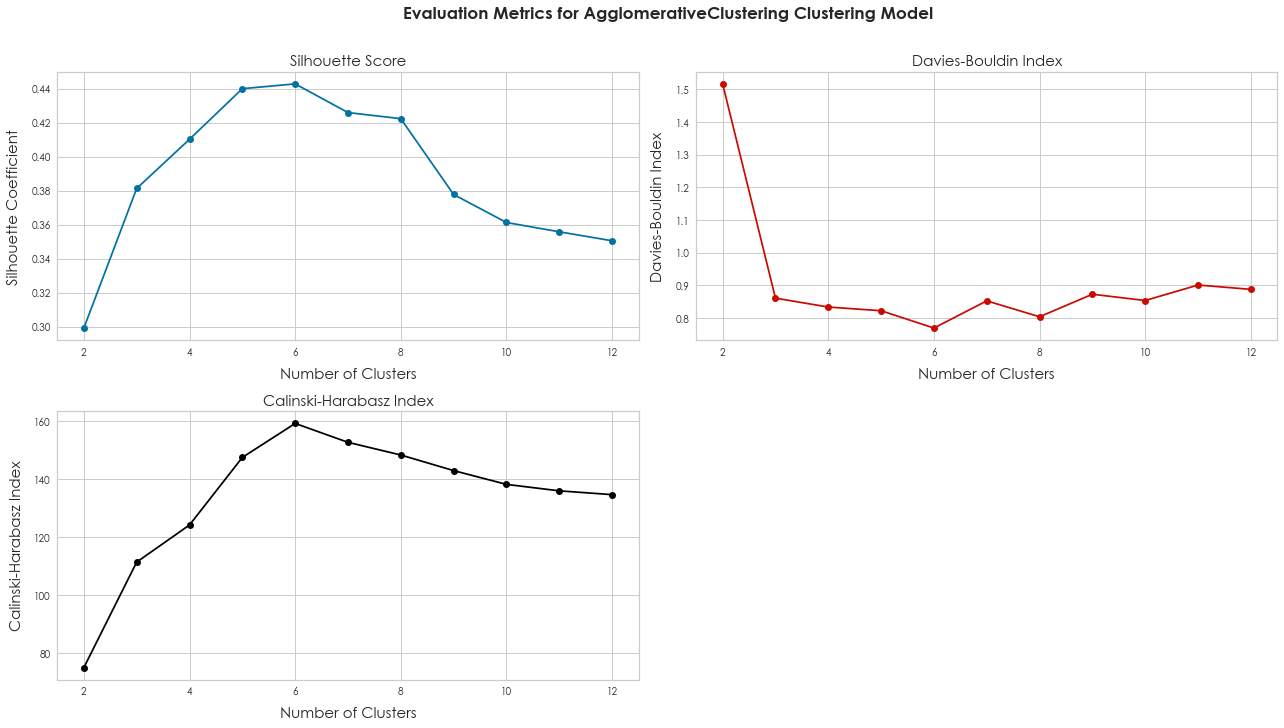

Coefficient Values of Evaluation Metrics for AgglomerativeClustering Clustering:


,Cluster Number,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
4,6,0.442801,0.769039,159.328629
3,5,0.439975,0.822044,147.579723
5,7,0.425939,0.852260,152.802061
6,8,0.422330,0.803527,148.422345
2,4,0.410209,0.833312,124.245830
1,3,0.381286,0.860553,111.425665
7,9,0.377732,0.872512,143.032348
8,10,0.361263,0.853296,138.272750
9,11,0.355789,0.900714,136.038841
10,12,0.350502,0.887401,134.730568


In [16]:
# Determining the number of clusters to use for evaluation and modelling

# Create a 2 by 2 subplot for displaying the plots
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.subplots_adjust(hspace=0.4)

# Set the style and font for the plot
sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'Century Gothic'

# Lists to store the metric scores for each cluster configuration
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Calculate metrics for varying number of clusters
for k in range(2, 13):
    agglomerative = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    labels = agglomerative.fit_predict(customer_df_final)
    
    # Calculate and store metric scores
    silhouette_scores.append(silhouette_score(customer_df_final, labels))
    davies_bouldin_scores.append(davies_bouldin_score(customer_df_final, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(customer_df_final, labels))
    
# Create a DataFrame to store the metric scores
agglomerative_metrics = {
    'Cluster Number': range(2,13),
    'Silhouette Score': silhouette_scores,
    'Davies-Bouldin Index': davies_bouldin_scores,
    'Calinski-Harabasz Index': calinski_harabasz_scores
}
agglomerative_metrics = pd.DataFrame(agglomerative_metrics)

# Plot the Silhouette Score
ax = axes[0,0]
ax.plot(range(2,13), silhouette_scores, marker='o')
ax.set_title('Silhouette Score', fontsize=15)
ax.set_xlabel('Number of Clusters', fontsize=15, labelpad=10)
ax.set_ylabel('Silhouette Coefficient', fontsize=15, labelpad=10)

# Plot the Davies-Bouldin Index
ax = axes[0,1]
ax.plot(range(2,13), davies_bouldin_scores, marker='o', color='r')
ax.set_title('Davies-Bouldin Index', fontsize=15)
ax.set_xlabel('Number of Clusters', fontsize=15, labelpad=10)
ax.set_ylabel('Davies-Bouldin Index', fontsize=15, labelpad=10)

# Plot the Calinski-Harabasz Index
ax = axes[1,0]
ax.plot(range(2,13), calinski_harabasz_scores, marker='o', color='black')
ax.set_title('Calinski-Harabasz Index', fontsize=15)
ax.set_xlabel('Number of Clusters', fontsize=15, labelpad=10)
ax.set_ylabel('Calinski-Harabasz Index', fontsize=15, labelpad=10)

# Remove the fourth empty subplot
fig.delaxes(axes[1, 1])

# Add a super title
plt.suptitle('Evaluation Metrics for AgglomerativeClustering Clustering Model', fontsize=17, y=1.01, fontweight='bold', x=0.52)

# Adjust layout and display the plots
plt.tight_layout()
print("Visualization of the Evaluation Metrics for AgglomerativeClustering Clustering:")
plt.show()

# Displaying the evaluation metrics
print("Coefficient Values of Evaluation Metrics for AgglomerativeClustering Clustering:")
agglomerative_metrics.sort_values(by='Silhouette Score', ascending=False)

### INSIGHTS GAINED FROM AGGLOMERATIVECLUSTERING ANALYSIS

From the above analysis, we see that the cluster number with the highest silhouette score is 6 with a silhouette score of 0.442801, likely indicating that choosing 6 clusters is the most well-defined option. However, to further validate and compare our results, we will also be using an elbow plot below to evaluate the optimal number of clusters.

### USING AN ELBOW PLOT TO FURTHER VISUALIZE THE NUMBER OF CLUSTERS

To further select our optimal number of clusters for AgglomerativeClustering Clustering, we will similarly use the elbow curve to identify a good number of clusters to be used.

Based on the elbow plot obtained, we see that it recommends 5 clusters to be utilized instead, which does not align with the results of the silhouette score. To decide the optimal cluster number for this model, we will be looking at a dendrogram (hierachical clustering) to validate our findings.

Elbow Curve to determine the number of clusters to be formed for Agglomerative Clustering:


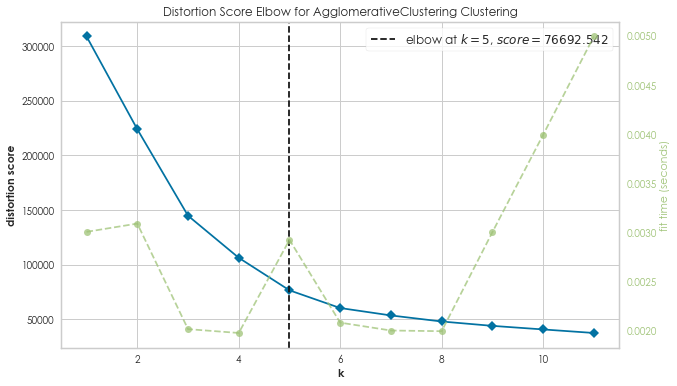

In [17]:
# Plot the elbow curve to identify the numbers of clusters to make

print('Elbow Curve to determine the number of clusters to be formed for Agglomerative Clustering:')

# Set the style and font for the plot
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Century Gothic'

# Set the figure size for the plot
plt.figure(figsize = (10, 6))

# Fitting the KElbowVisualizer to plot the elbow curve
elbow_curve = KElbowVisualizer(AgglomerativeClustering(affinity='euclidean', linkage='ward'), k=(1, 12)).fit(customer_df_final)

# Plot customisation
elbow_curve.ax.set_xlabel('k', fontweight='bold')
elbow_curve.ax.set_ylabel('distortion score', fontweight='bold')

# Plot the elbow curve
elbow_curve.show()
plt.show()

### VISUALIZING CLUSTERS USING HIERARCHICAL CLUSTERING DENDROGRAM

To gain insights into the structure and relationships among data points, we will use a dendrogram to visualize the clustering process for the AgglomerativeClustering model.

**plot_dendrogram** : which efficiently computes the linkage matrix and plots the corresponding dendrogram. 

- The function calculates the counts of samples under each node while progressively merging clusters. It then constructs a linkage matrix that captures the relationships between clusters and distances.


- From this dendrogram, it can be seen that **6 clusters** is optimal for this model, by analyzing the structure of the hierachical clustering model. Based on this result, it would be a better choice to select 6 clusters for AgglomerativeClustering instead. However, further analysis will be conducted should this model be chosen for tuning and further analysis.

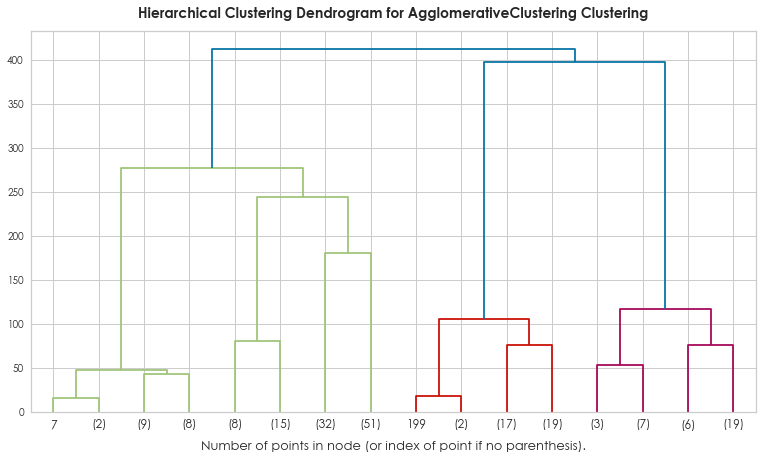

In [18]:
# Visualising clusters needed using a dendrogram for hierachical clustering

# Define and initialise a function to plot the dendrogram
def plot_dendrogram(model, **kwargs):
    # Create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Fit the hierarchical clustering model to the data
model = AgglomerativeClustering(compute_distances=True).fit(customer_df_final)

# Adjust the size of the plot
plt.figure(figsize=(13,7))

# Plot the hierarchical clustering dendrogram
plt.title("Hierarchical Clustering Dendrogram for AgglomerativeClustering Clustering", fontsize=14, fontweight='bold', y=1.02)

# Plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).", fontsize=13, labelpad=10)

# Display the plot
plt.show()

### <font color ='blue'>CLUSTERING MODEL 3 : GAUSSIAN MIXTURE CLUSTERING MODEL</font>

### DETERMINE THE OPTIMAL NUMBER OF CLUSTERS USING EVALUATION METRICS

To determine the optimal number of clusters for Gaussian Mixture Clustering, evaluation metrics like silhouette score, Davies Bouldin score, and Calinski Harabasz score is utilized for analysis.

For each potential cluster component (ranging from 2 to 12 clusters), the following evaluation metrics are calculated:

- **Silhouette Score**: This score measures the closeness of data points in one cluster to other points in the same cluster compared to points in neighboring clusters. Higher values indicate better-defined clusters.


- **Davies-Bouldin Index**: This index quantifies the average similarity between each cluster and its most similar cluster. Lower values indicate better clustering.


- **Calinski-Harabasz Index**: Also known as the Variance Ratio Criterion, this index assesses the ratio of between-cluster dispersion to within-cluster dispersion. Higher values suggest more distinct clusters.

These metrics are computed for varying number of clusters, and the results are stored in a DataFrame 'gmm_metrics' :


- The Silhouette Score subplot displays the silhouette coefficients for different cluster numbers. 
- The Davies-Bouldin Index subplot demonstrates the index's values against cluster counts. 
- The Calinski-Harabasz Index subplot illustrates how the index varies as the number of clusters changes.

Visualization of the Evaluation Metrics for Gaussian Mixture Clustering:


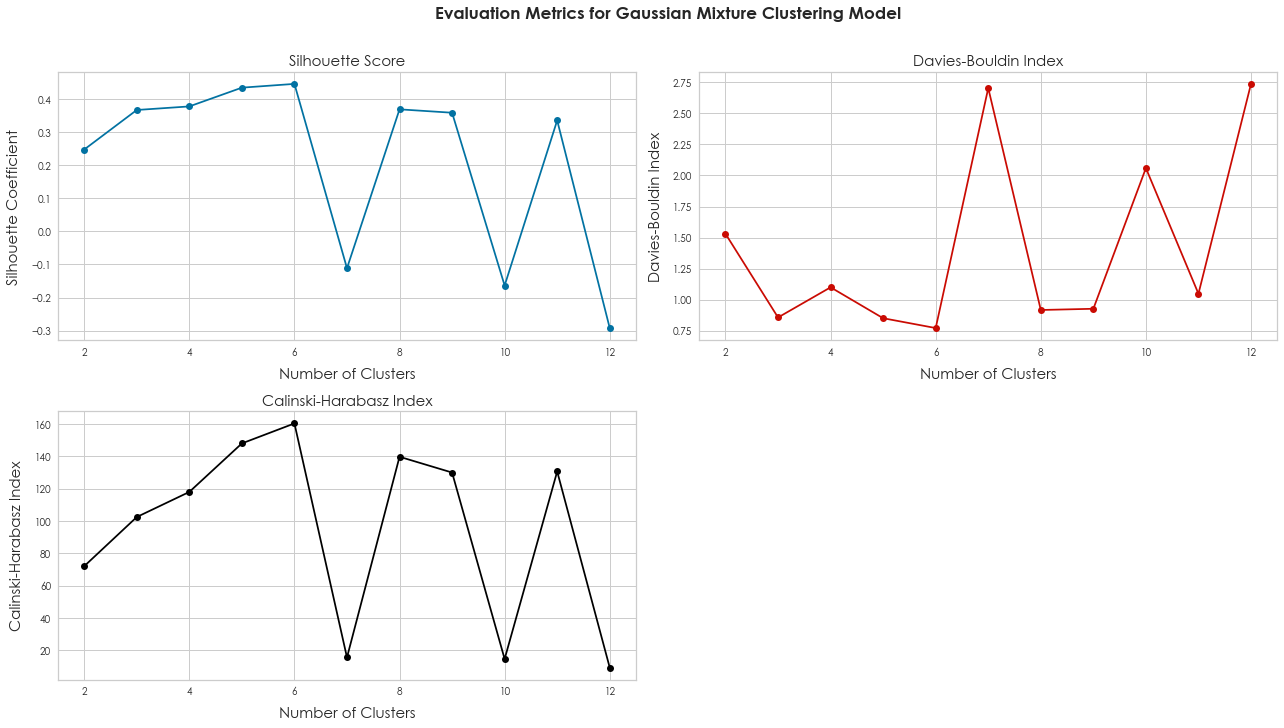

Coefficient Values of Evaluation Metrics for Gaussian Mixture Clustering:


,Cluster Number,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
4,6,0.445547,0.770881,160.474185
3,5,0.434139,0.850072,148.097542
2,4,0.377469,1.099116,118.057655
6,8,0.368642,0.916406,139.824864
1,3,0.366666,0.856215,102.520743
7,9,0.358395,0.926172,130.062326
9,11,0.335193,1.047281,130.718819
0,2,0.247205,1.530269,72.083094
5,7,-0.111451,2.703897,15.588550
8,10,-0.163831,2.059260,14.616599


In [19]:
# Determining the number of clusters to use for evaluation and modelling

# Create a 2 by 2 subplot for displaying the plots
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.subplots_adjust(hspace=0.4)

# Set the style and font for the plot
sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'Century Gothic'

# Lists to store the metric scores for each cluster configuration
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Calculate metrics for varying number of clusters
for k in range(2, 13):
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(customer_df_final)
    
    # Calculate and store metric scores
    silhouette_scores.append(silhouette_score(customer_df_final, labels))
    davies_bouldin_scores.append(davies_bouldin_score(customer_df_final, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(customer_df_final, labels))
    
# Create a DataFrame to store the metric scores
gmm_metrics = {
    'Cluster Number': range(2,13),
    'Silhouette Score': silhouette_scores,
    'Davies-Bouldin Index': davies_bouldin_scores,
    'Calinski-Harabasz Index': calinski_harabasz_scores
}
gmm_metrics = pd.DataFrame(gmm_metrics)

# Plot the Silhouette Score
ax = axes[0,0]
ax.plot(range(2,13), silhouette_scores, marker='o')
ax.set_title('Silhouette Score', fontsize=15)
ax.set_xlabel('Number of Clusters', fontsize=15, labelpad=10)
ax.set_ylabel('Silhouette Coefficient', fontsize=15, labelpad=10)

# Plot the Davies-Bouldin Index
ax = axes[0,1]
ax.plot(range(2,13), davies_bouldin_scores, marker='o', color='r')
ax.set_title('Davies-Bouldin Index', fontsize=15)
ax.set_xlabel('Number of Clusters', fontsize=15, labelpad=10)
ax.set_ylabel('Davies-Bouldin Index', fontsize=15, labelpad=10)

# Plot the Calinski-Harabasz Index
ax = axes[1,0]
ax.plot(range(2,13), calinski_harabasz_scores, marker='o', color='black')
ax.set_title('Calinski-Harabasz Index', fontsize=15)
ax.set_xlabel('Number of Clusters', fontsize=15, labelpad=10)
ax.set_ylabel('Calinski-Harabasz Index', fontsize=15, labelpad=10)

# Remove the fourth empty subplot
fig.delaxes(axes[1, 1])

# Add a super title
plt.suptitle('Evaluation Metrics for Gaussian Mixture Clustering Model', fontsize=17, y=1.01, fontweight='bold', x=0.52)

# Adjust layout and display the plots
plt.tight_layout()
print("Visualization of the Evaluation Metrics for Gaussian Mixture Clustering:")
plt.show()

# Displaying the evaluation metrics
print("Coefficient Values of Evaluation Metrics for Gaussian Mixture Clustering:")
gmm_metrics.sort_values(by='Silhouette Score', ascending=False)

### INSIGHTS GAINED FROM GAUSSIAN MIXTURE ANALYSIS

From the above analysis, we see that the cluster number with the highest silhouette score is 6 with a silhouette score of 0.445547, likely indicating that choosing 6 clusters is the most well-defined option for this model and we will proceed with using 6 clusters for further evaluation of the clusters.

### <font color='blue'>CLUSTERING MODEL 4 : DBSCAN CLUSTERING MODEL</font>

### DETERMINE THE OPTIMAL NUMBER OF CLUSTERS USING EVALUATION METRICS

To determine the optimal number of clusters for DBSCAN Clustering, evaluation metrics like silhouette score, Davies Bouldin score, and Calinski Harabasz score is utilized for analysis.

For each potential eps_value and min_sample_values, the following evaluation metrics are calculated:

- **Silhouette Score**: This score measures the closeness of data points in one cluster to other points in the same cluster compared to points in neighboring clusters. Higher values indicate better-defined clusters.


- **Davies-Bouldin Index**: This index quantifies the average similarity between each cluster and its most similar cluster. Lower values indicate better clustering.


- **Calinski-Harabasz Index**: Also known as the Variance Ratio Criterion, this index assesses the ratio of between-cluster dispersion to within-cluster dispersion. Higher values suggest more distinct clusters.

These metrics are computed for varying number of eps_value and min_sample_values, and the results are stored in a DataFrame 'dbscan_metrics' :


- The Silhouette Score subplot displays the silhouette coefficients for different cluster numbers. 
- The Davies-Bouldin Index subplot demonstrates the index's values against cluster counts. 
- The Calinski-Harabasz Index subplot illustrates how the index varies as the number of clusters changes.

Visualization of the Evaluation Metrics for DBSCAN Clustering:


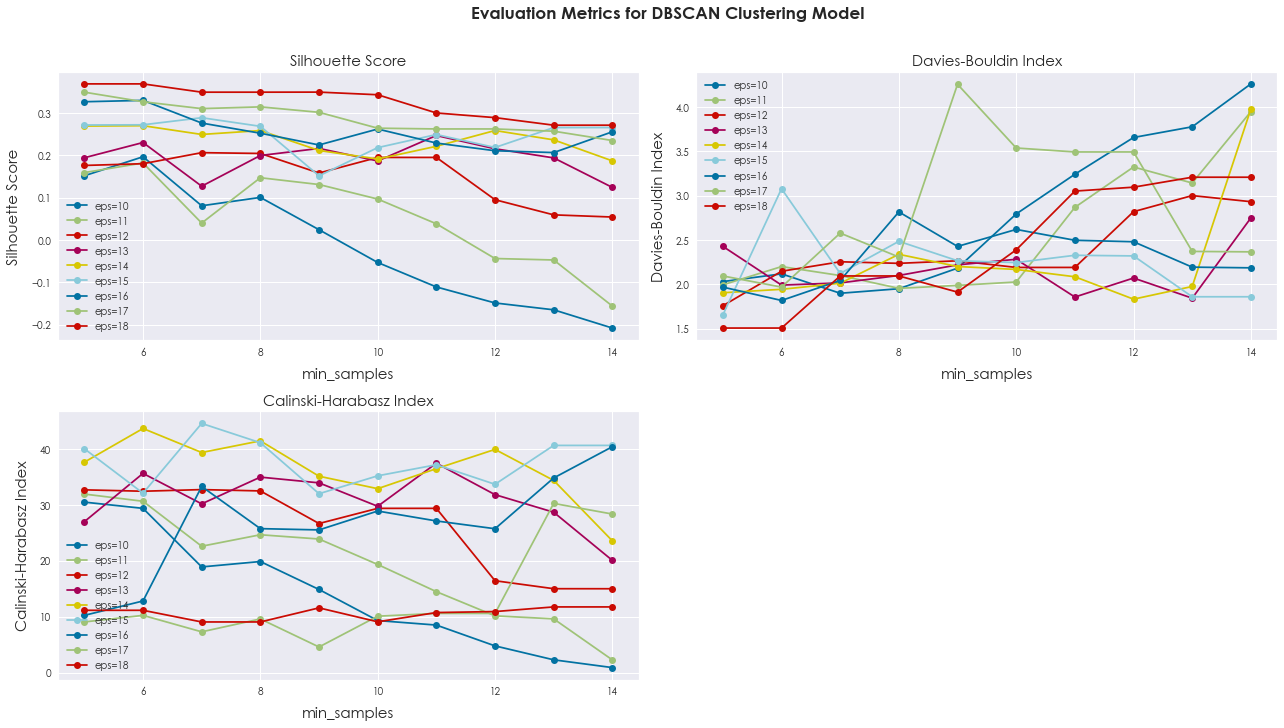

Coefficient Values of Evaluation Metrics for DBSCAN Clustering:


,eps,min_samples,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
81,18,6,0.369226,1.505758,11.137238
80,18,5,0.369226,1.505758,11.137238
84,18,9,0.349769,1.911240,11.570585
70,17,5,0.349628,2.093680,9.050237
83,18,8,0.349628,2.093680,9.050237
...,...,...,...,...,...
6,10,11,-0.110918,3.241390,8.493182
7,10,12,-0.148793,3.656084,4.765771
19,11,14,-0.156173,3.948116,2.257919
8,10,13,-0.164983,3.776908,2.272685


In [20]:
# Determining the number of clusters to use for evaluation and modelling

# Create a 2 by 2 subplot for displaying the plots
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.subplots_adjust(hspace=0.4)

# Set the style and font for the plot
sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'Century Gothic'

# Lists to store the metric scores for each cluster configuration
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

eps_values = [10, 11, 12, 13, 14, 15, 16, 17, 18]
min_samples_values = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

# Calculate metrics for varying eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(customer_df_final)
        
        silhouette_scores.append(silhouette_score(customer_df_final, cluster_labels))
        davies_bouldin_scores.append(davies_bouldin_score(customer_df_final, cluster_labels))
        calinski_harabasz_scores.append(calinski_harabasz_score(customer_df_final, cluster_labels))

# Create a DataFrame to store the metric scores
dbscan_metrics = {
    'eps': np.repeat(eps_values, len(min_samples_values)),
    'min_samples': np.tile(min_samples_values, len(eps_values)),
    'Silhouette Score': silhouette_scores,
    'Davies-Bouldin Index': davies_bouldin_scores,
    'Calinski-Harabasz Index': calinski_harabasz_scores
}
dbscan_metrics = pd.DataFrame(dbscan_metrics)

# Iterate through the metrics and plot them
metric_names = ['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index']
for row, metric in enumerate(metric_names):
    ax = axes[row // 2, row % 2]
    for eps in eps_values:
        scores = dbscan_metrics[dbscan_metrics['eps'] == eps][metric]
        ax.plot(min_samples_values, scores, marker='o', label=f'eps={eps}')
    ax.set_title(metric, fontsize=15)
    ax.set_xlabel('min_samples', fontsize=15, labelpad=10)
    ax.set_ylabel(metric, fontsize=15, labelpad=10)
    ax.legend()

# Remove the fourth empty subplot
fig.delaxes(axes[1, 1])

# Add a super title
plt.suptitle('Evaluation Metrics for DBSCAN Clustering Model', fontsize=17, y=1.01, fontweight='bold', x=0.52)

# Adjust layout and display the plots
plt.tight_layout()
print("Visualization of the Evaluation Metrics for DBSCAN Clustering:")
plt.show()

# Displaying the evaluation metrics
print("Coefficient Values of Evaluation Metrics for DBSCAN Clustering:")
dbscan_metrics.sort_values(by='Silhouette Score', ascending=False)

### INSIGHTS GAINED FROM DBSCAN ANALYSIS

From the above analysis, we see that the combination of eps value of 18 and min samples of 6 returns the best silhouette score of 0.369226. Hence, this combination of values will be utilized for clustering and determining the number of optimal number of clusters for this model.

### <font color='blue'>CLUSTERING MODEL 5 : MEANSHIFT CLUSTERING MODEL</font>

### DETERMINE THE OPTIMAL NUMBER OF CLUSTERS USING EVALUATION METRICS

To determine the optimal number of clusters for MeanShift Clustering, evaluation metrics like silhouette score, Davies Bouldin score, and Calinski Harabasz score is utilized for analysis.

**What is Bandwidth?**

- Small Bandwidth: When the bandwidth is set to a small value, the search space is narrow, leading to more fine-grained clusters. This results in many small, closely-packed clusters.


- Large Bandwidth: A larger bandwidth results in a broader search space, causing data points to be attracted to the global modes of the data distribution. Clusters may merge together, and the algorithm might identify fewer, larger clusters.

<b>Hence, a trade-off between a small and large bandwidth is necessary to return optimal results.</b>

For each bandwidth value (20 to 32), we estimate the number of clusters formed and  the following evaluation metrics are calculated:

- **Silhouette Score**: This score measures the closeness of data points in one cluster to other points in the same cluster compared to points in neighboring clusters. Higher values indicate better-defined clusters.


- **Davies-Bouldin Index**: This index quantifies the average similarity between each cluster and its most similar cluster. Lower values indicate better clustering.


- **Calinski-Harabasz Index**: Also known as the Variance Ratio Criterion, this index assesses the ratio of between-cluster dispersion to within-cluster dispersion. Higher values suggest more distinct clusters.

These metrics are computed for varying number of bandwidth values, and the results are stored in a DataFrame 'meanshift_metrics' :


- The Silhouette Score subplot displays the silhouette coefficients for different cluster numbers. 
- The Davies-Bouldin Index subplot demonstrates the index's values against cluster counts. 
- The Calinski-Harabasz Index subplot illustrates how the index varies as the number of clusters changes.

Visualization of the Evaluation Metrics for Mean Shift Clustering:


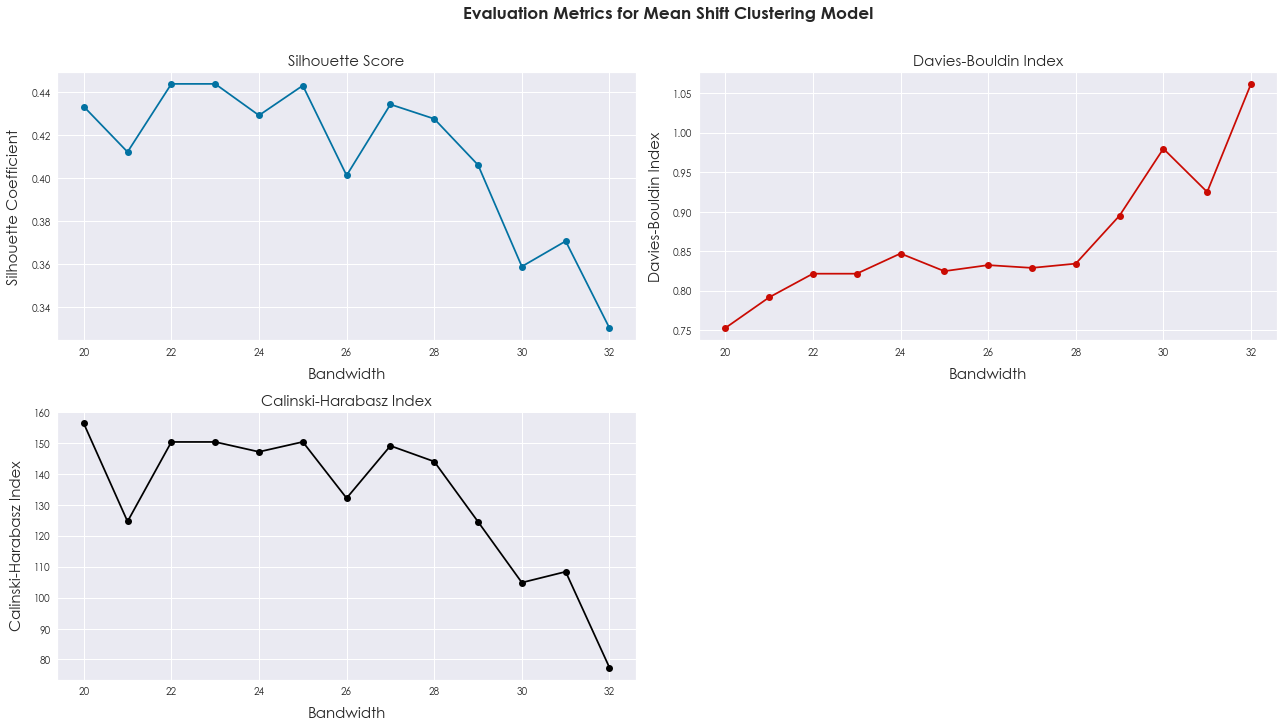

Coefficient Values of Evaluation Metrics for Mean Shift Clustering:


,Bandwidth,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index,Estimated Clusters
2,22,0.443843,0.821560,150.389269,5
3,23,0.443843,0.821560,150.389269,5
5,25,0.443064,0.824770,150.411068,5
7,27,0.434322,0.828918,149.141036,5
0,20,0.433330,0.752722,156.381805,8
4,24,0.429229,0.847131,147.191760,5
8,28,0.427617,0.834297,144.048124,5
1,21,0.412224,0.791547,124.653108,7
9,29,0.406188,0.895147,124.565291,4
6,26,0.401325,0.832420,132.201409,5


In [21]:
# Determining the number of clusters to use for evaluation and modelling

# Create a 2 by 2 subplot for displaying the plots
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.subplots_adjust(hspace=0.4)

# Set the style and font for the plot
sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'Century Gothic'

# Lists to store the metric scores for each bandwidth
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
estimated_clusters = []

# Calculate Davies-Bouldin Index for varying bandwidths
for bandwidth in range(20,33):
    mean_shift = MeanShift(bandwidth=bandwidth)
    labels = mean_shift.fit_predict(customer_df_final)
    
    # Calculate and store metric scores
    silhouette_scores.append(silhouette_score(customer_df_final, labels))
    davies_bouldin_scores.append(davies_bouldin_score(customer_df_final, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(customer_df_final, labels))
    
    # Calculate the number of estimated clusters
    unique_labels = np.unique(labels)
    n_clusters_ = len(unique_labels)
    estimated_clusters.append(n_clusters_)

# Create a DataFrame to store the metric scores
meanshift_metrics = {
    'Bandwidth': range(20,33),
    'Silhouette Score': silhouette_scores,
    'Davies-Bouldin Index': davies_bouldin_scores,
    'Calinski-Harabasz Index': calinski_harabasz_scores,
    'Estimated Clusters': estimated_clusters
}
meanshift_metrics = pd.DataFrame(meanshift_metrics)

# Plot the Silhouette Score
ax = axes[0,0]
ax.plot(range(20,33), silhouette_scores, marker='o')
ax.set_title('Silhouette Score', fontsize=15)
ax.set_xlabel('Bandwidth', fontsize=15, labelpad=10)
ax.set_ylabel('Silhouette Coefficient', fontsize=15, labelpad=10)

# Plot the Davies-Bouldin Index
ax = axes[0,1]
ax.plot(range(20,33), davies_bouldin_scores, marker='o', color='r')
ax.set_title('Davies-Bouldin Index', fontsize=15)
ax.set_xlabel('Bandwidth', fontsize=15, labelpad=10)
ax.set_ylabel('Davies-Bouldin Index', fontsize=15, labelpad=10)

# Plot the Calinski-Harabasz Index
ax = axes[1,0]
ax.plot(range(20,33), calinski_harabasz_scores, marker='o', color='black')
ax.set_title('Calinski-Harabasz Index', fontsize=15)
ax.set_xlabel('Bandwidth', fontsize=15, labelpad=10)
ax.set_ylabel('Calinski-Harabasz Index', fontsize=15, labelpad=10)

# Remove the last empty subplot
fig.delaxes(axes[1, 1])

# Add a super title
plt.suptitle('Evaluation Metrics for Mean Shift Clustering Model', fontsize=17, y=1.01, fontweight='bold', x=0.52)

# Adjust layout and display the plots
plt.tight_layout()
print("Visualization of the Evaluation Metrics for Mean Shift Clustering:")
plt.show()

# Displaying the evaluation metrics
print("Coefficient Values of Evaluation Metrics for Mean Shift Clustering:")
meanshift_metrics.sort_values(by='Silhouette Score', ascending=False)

### INSIGHTS GAINED FROM MEANSHIFT ANALYSIS

From the above analysis, we see that the bandwidth of 22 returns the highest silhouette score of 0.443843. In this case, bandwidth value of 22 and 23 both have the same silhouette score, which estimates 5 clusters as the optimal number of clusters. This indicates that choosing 5 clusters is the most well-defined option for this model and we will proceed with using 5 clusters for further evaluation of the clusters, with a bandwidth value of 22.

### RETRIEVING THE BEST SCORES FROM DIFFERENT MODELS SELECTED

- To evaluate which model provides the best silhouette score, we will retrieve the metric dataframes from the different models and store only the best silhouette score from each model into a dictionary 'best_sil_scores'.

- Then, a barplot is plotted to visually compare between the models and identify the model that provides the highest silhouette score. From the barplot, we see that **K-Means Clustering Algorithm is able to obtain the best silhouette score of 0.452**, higher than the rest of the models.

Best Silhouette Scores from 5 Models Tested :

1. K-Means Clustering : 0.452
2. Gaussian Mixture Clustering : 0.446
3. Mean-Shift Clustering : 0.444
4. AgglomerativeClustering Clustering : 0.443
5. DBSCAN Clustering : 0.369

Based on the scores retrieved, the best choice seems to be K-Means for model tuning and improvement, complemented by the high silhouette score. However, more analysis will be done before settling on a model.

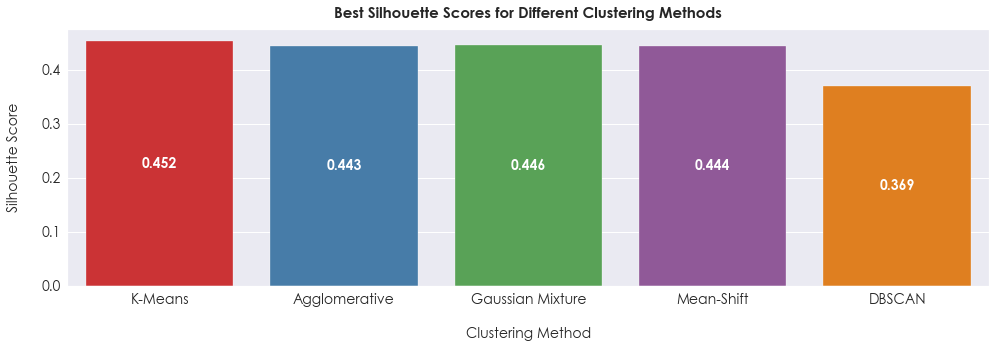

Retrieving the Best Silhouette Scores from the Model Selections:


,Silhouette Score
K-Means Clustering,0.452055
GaussianMixture Clustering,0.445547
MeanShift Clustering,0.443843
AgglomerativeClustering Clustering,0.442801
DBSCAN Clustering,0.369226


In [22]:
# Retrieving the best silhouette scores from the model selection process

# Obtaining the score dataframes
result_dataframes = [
    ('K-Means Clustering', kmeans_metrics.sort_values(by='Silhouette Score', ascending=False)),
    ('AgglomerativeClustering Clustering', agglomerative_metrics.sort_values(by='Silhouette Score', ascending=False)),
    ('GaussianMixture Clustering', gmm_metrics.sort_values(by='Silhouette Score', ascending=False)),
    ('MeanShift Clustering', meanshift_metrics.sort_values(by='Silhouette Score', ascending=False)),
    ('DBSCAN Clustering', dbscan_metrics.sort_values(by='Silhouette Score', ascending=False))
]

# Create a dictionary to store the best silhouette scores
best_sil_scores = {}

# Iterate through the dataframes to retrieve the best scores
for name, df in result_dataframes:
    if name == 'DBSCAN Clustering':
        best_score = df.iloc[0, 2]  
    else:
        best_score = df.iloc[0, 1] 
        
    best_sil_scores[name] = best_score
    
# Convert the dictionary to a DataFrame
best_sil_scores = pd.DataFrame.from_dict(best_sil_scores, orient='index', columns=['Silhouette Score'])

# Plot the bargraph to display the results graphically

# Adjust figure and size of barplot
plt.figure(figsize=(14, 5))
plt.rcParams['font.family'] = 'Century Gothic'

ax = sns.barplot(x=best_sil_scores.index, y='Silhouette Score', data=best_sil_scores, palette='Set1')

# Adding the silhouette scores as text on top of the bars
ax = plt.gca()
ax.bar_label(ax.containers[0], label_type = 'center', fmt='%.3f', fontweight='bold', fontsize=14, color='white')

# Customisation of the barchart
plt.xlabel('Clustering Method', fontsize=14, labelpad=20)
plt.ylabel('Silhouette Score', fontsize=14, labelpad=20)
plt.title('Best Silhouette Scores for Different Clustering Methods', fontsize=15, fontweight='bold', y=1.02)
xtick = ['K-Means', 'Agglomerative', 'Gaussian Mixture', 'Mean-Shift', 'DBSCAN']
ax.set_xticklabels(xtick, fontsize=14)
plt.yticks(fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

# Display the results in tabular format
print("Retrieving the Best Silhouette Scores from the Model Selections:")
best_sil_scores.sort_values(by='Silhouette Score', ascending=False)

### VISUALISATION OF THE CLUSTERS FROM DIFFERENT MODELS SELECTED

- To visualise the appearance and distinctiveness of the clusters, scatterplots of clusters from the various models will be plotted to view how the clusters are arranged.

- Define a list of clustering models with the appropriate cluster, bandwidth, eps, min_samples values in accordance to the values that provided the best metric scores from above. Loop through the models to plot the charts in a 3 x 2 subplot arrangement.

- Obtain cluster labels by fitting and predicting on the entire dataset, setting the x-axis to 'Income (k$)', and y-axis to 'How Much They Spend' as an illustration of how the clusters will be arranged.

Insights From The Clusters for 5 Models :

- K-Means Clustering : We see an overlap for Cluster 1 and 5 when 6 clusters are plotted, indicating that there is a lack of distinctiveness between these two clusters, hence for model tuning, we will re-evaluate the optimal number of clusters according to score and definition of each individual cluster.


- AgglomerativeClustering Clustering : Similar to K-Means, we see an overlap for Cluster 1 and 5 when 6 clusters are plotted, indicating a lack of distinctiveness between the two.


- Gaussian Mixture Clustering : For this model, there is also an apparent overlap in clusters between cluster 1 and 4 when 6 clusters are plotted, indicating a lack of distinctiveness between the two clusters.


- Mean-Shift Clustering : In this model, we see that the clusters are relatively well-defined and no cluster overlap can be seen when 5 clusters are plotted, indicating good distinctiveness between clusters. **However, we will not use this model for further tuning as its best silhouette score is still lower than the silhouette score for K-Means when 5 clusters are plotted. (Refer to the next segment)**


- DBSCAN Clustering : The clusters in DBSCAN are not well-defined and do not provide a good clustering pattern, hence this model performs poorly in identifying customer clusters, despite having relatively moderate silhouette scores.

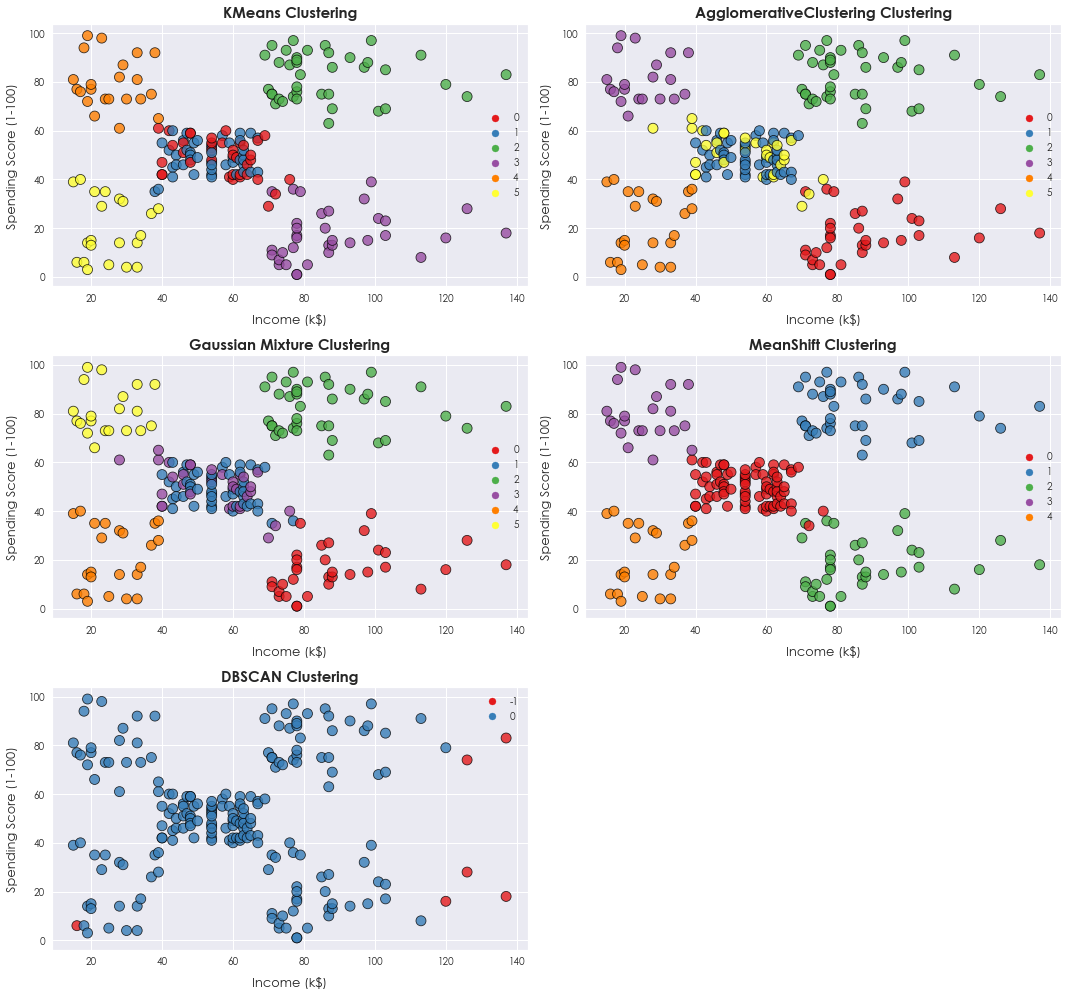

In [23]:
# Visualise all the clusters made from different models

# Defining the list of clustering models tested
clustering_models = [
    KMeans(n_clusters=6),
    AgglomerativeClustering(n_clusters=6),
    GaussianMixture(n_components=6),
    MeanShift(bandwidth=22),
    DBSCAN(eps=18, min_samples=6)
]

# Define the list of model names for labelling of each graph
model_names = ['KMeans','AgglomerativeClustering','Gaussian Mixture','MeanShift','DBSCAN']

# Plotting the clusters
plt.figure(figsize=(15,14))

# Loop through the models to print their clusters
for i, model in enumerate(clustering_models):
    plt.subplot(3,2 , i + 1)  # 2 rows, 3 columns
    cluster_labels = model.fit_predict(customer_df_final)
    sns.scatterplot(x='Income (k$)', y='Spending Score (1-100)', data=customer_df_final, hue=cluster_labels, palette="Set1", s=100, alpha=0.8, edgecolor='black')

    plt.title(f'{model_names[i]} Clustering', fontsize=15, fontweight='bold')
    plt.xlabel("Income (k$)", fontsize=13, labelpad=10)
    plt.ylabel("Spending Score (1-100)", fontsize=13, labelpad=10)
    plt.tick_params(labelsize=10)
    plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

### PERFORMING HYPERPARAMETER TUNING ON THE CHOSEN MODEL

### COMPARISON OF SCORES BETWEEN K-MEANS AND MEANSHIFT FOR 5 CLUSTERS

Based on the scores for 5 clusters between K-Means and Meanshift Clustering Models, it is clear that K-Means still returns a higher silhouette score of 0.444243 compared to Meanshift of 0.443843, and while may seem insignificant, still proves that K-Means is able to better form slightly more distinct clusters at k = 5, in comparison to MeanShift. Looking at the other metrics like Davies-Bouldin Index and Calinski-Harabasz Index, it can be seen that K-Means still perform slightly better, even if the significance is low.

Hence, K-Means Clustering Model will be used for our final evaluation.

In [24]:
# Comparing the scores obtained between K-Means and MeanShift for 5 Clusters

# Obtain the desired rows from the K-Means and Meanshift Dataframes
print(f"Evaluation Results for 5 Clusters for K-Means :\n{kmeans_metrics.sort_values(by='Silhouette Score', ascending=False).iloc[1]}\n")
print(f"Evaluation Results for 5 Clusters for Mean-Shift :\n{meanshift_metrics.sort_values(by='Silhouette Score', ascending=False).iloc[0]}")

Evaluation Results for 5 Clusters for K-Means :
Cluster Number               5.000000
Silhouette Score             0.444243
Davies-Bouldin Index         0.819643
Calinski-Harabasz Index    150.871930
Name: 3, dtype: float64

Evaluation Results for 5 Clusters for Mean-Shift :
Bandwidth                   22.000000
Silhouette Score             0.443843
Davies-Bouldin Index         0.821560
Calinski-Harabasz Index    150.389269
Estimated Clusters           5.000000
Name: 2, dtype: float64


### MODEL IMPROVEMENT : RE-FITTING K-MEANS MODEL WITH VARYING PARAMETERS

- Create a range of values of different hyperparameters to finetune the K-Means algorithm clustering model.
- Fit the parameters to the model and the dataset for looping through of the parameters.

Parameters Defined :
- n_clusters_range: It defines a range of potential cluster numbers for K-Means clustering to find the optimal number of clusters that best group the data.


- init_methods: These methods determine how the initial cluster centroids are chosen in K-Means: "k-means++" intelligently initializes centroids, while "random" selects centroids randomly from the data.


- max_iters: It specifies the maximum iterations K-Means performs to achieve convergence, updating centroids and cluster assignments within this limit.


- n_inits: This parameter controls how many times K-Means is executed with different initializations, aiming to improve the final cluster arrangement by selecting the best result based on minimized distances.

In [25]:
# Tune the hyperparameters in K-Means Model to improve the scores and cluster visibility

# Define range of values for different hyperparameters
n_clusters_range = range(2, 12)
init_methods = ["k-means++", "random"]
max_iters = [100, 200, 300]
n_inits = [10, 15, 20]

# Dictionary to store the best silhouette scores for each cluster number
best_scores = {}  

# Iterate over different cluster numbers
for k in n_clusters_range:
    best_score = -1 
    best_params = None
    
    # Iterate over different hyperparameter combinations for each cluster number
    for init in init_methods:
        for max_iter in max_iters:
            for n_init in n_inits:
                kmeans_kwargs = {
                    "n_clusters": k,
                    "init": init,
                    "n_init": n_init,
                    "max_iter": max_iter,
                    "random_state": 42,
                }
                model = KMeans(**kmeans_kwargs).fit(customer_df_final)
                label = model.labels_
                score = silhouette_score(customer_df_final, label, metric='euclidean')
                
                # Update the best score and parameters if the current score is better
                if score > best_score:
                    best_score = score
                    best_params = kmeans_kwargs
                    
    # Print the best scores for each cluster value
    best_scores[k] = (best_params, best_score)

# Print the best scores and corresponding parameters
print("======================================================================\nTuned Silhouette Scores and Parameters For K-Means Clusters:\n======================================================================\n")

for k, (best_params, best_score) in best_scores.items():
    print("For n_clusters = {:2}, Best Silhouette Score: {:.4f}, Best Parameters: {}\n".format(k, best_score, best_params))

Tuned Silhouette Scores and Parameters For K-Means Clusters:

For n_clusters =  2, Best Silhouette Score: 0.2931, Best Parameters: {'n_clusters': 2, 'init': 'k-means++', 'n_init': 10, 'max_iter': 100, 'random_state': 42}

For n_clusters =  3, Best Silhouette Score: 0.3838, Best Parameters: {'n_clusters': 3, 'init': 'k-means++', 'n_init': 10, 'max_iter': 100, 'random_state': 42}

For n_clusters =  4, Best Silhouette Score: 0.4053, Best Parameters: {'n_clusters': 4, 'init': 'k-means++', 'n_init': 10, 'max_iter': 100, 'random_state': 42}

For n_clusters =  5, Best Silhouette Score: 0.4442, Best Parameters: {'n_clusters': 5, 'init': 'k-means++', 'n_init': 10, 'max_iter': 100, 'random_state': 42}

For n_clusters =  6, Best Silhouette Score: 0.4521, Best Parameters: {'n_clusters': 6, 'init': 'random', 'n_init': 15, 'max_iter': 100, 'random_state': 42}

For n_clusters =  7, Best Silhouette Score: 0.4410, Best Parameters: {'n_clusters': 7, 'init': 'k-means++', 'n_init': 20, 'max_iter': 100, 'r

### SELECTING BETWEEN 5 AND 6 CLUSTERS FOR K-MEANS CLUSTERING MODEL

- From the above scores, due to 6 clusters having an overlap as seen above, the cluster for K-Means providing the second highest silhouette score of 0.4442 is 5 clusters, hence we will be evaluating the cluster patterns for 5 clusters as well.
- To select whether to use 5 or 6 clusters, set and initialize the K-Means Clustering Model to both 5 and 6 clusters.
- View cluster centers using '*' symbols to identify the centerpoint of each cluster and evaluate the distance between these points for varying clusters.

Visualising Top 2 K-Means Clusters with the Highest Silhouette Scores :


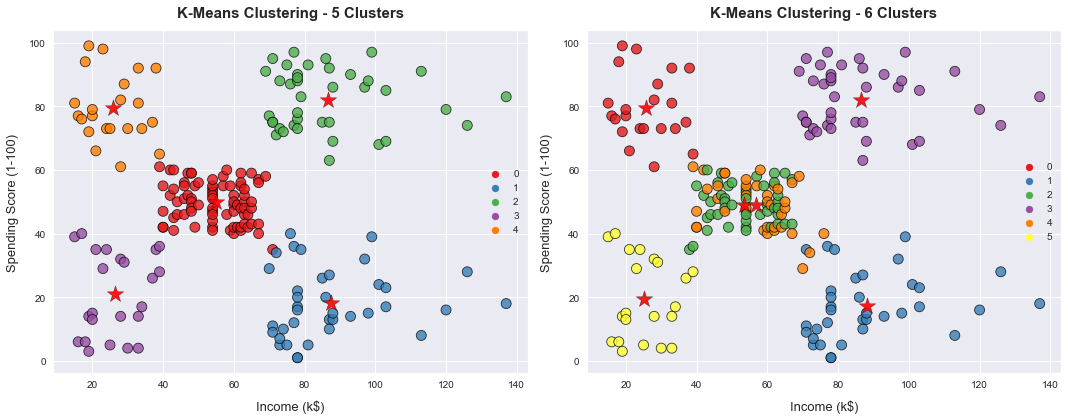

,Cluster Number,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
4,6,0.452055,0.747522,166.583496
3,5,0.444243,0.819643,150.871930


In [26]:
# Evaluate how defined the clusters are formed in KMeans

# Set the style of the plot to darkgrid
sns.set_style('darkgrid')

# Create KMeans instances with the top 2 number of clusters
num_clusters_list = [5, 6]
fig, axes = plt.subplots(1, len(num_clusters_list), figsize=(15, 6))

for i, num_clusters in enumerate(num_clusters_list):
    kmeans = KMeans(n_clusters=num_clusters, random_state=21, n_init=10, init='k-means++')
    kmeans.fit(customer_df_final)
    cluster_labels = kmeans.predict(customer_df_final)
    
    # Create a scatter plot for K-Means clustering with the current number of clusters
    sns.scatterplot(x='Income (k$)', y='Spending Score (1-100)', data=customer_df_final, hue=cluster_labels, palette="Set1", s=100, alpha=0.8, edgecolor='black', ax=axes[i])
    
    # Plot the cluster centers in red
    centers = kmeans.cluster_centers_
    axes[i].scatter(centers[:, 1], centers[:, 2], c='red', s=300, alpha=0.9, edgecolor='black', marker='*')
    
    # Set plot title and axis labels
    axes[i].set_title(f"K-Means Clustering - {num_clusters} Clusters", fontsize=15, fontweight='bold', y=1.02)
    axes[i].set_xlabel("Income (k$)", fontsize=13, labelpad=10)
    axes[i].set_ylabel("Spending Score (1-100)", fontsize=13, labelpad=10)
    
    # Set tick label sizes
    axes[i].tick_params(labelsize=10)

plt.tight_layout()  # Adjust layout for better visualization
print('Visualising Top 2 K-Means Clusters with the Highest Silhouette Scores :')
plt.show()  # Display the plot

# Retrieve the top 3 rows from the kmeans metrics table
kmeans_metrics.sort_values(by='Silhouette Score', ascending=False).head(2)

### ANALYSIS FROM VISUALIZATIONS FOR 5 AND 6 CLUSTERS

From the scatterplots, it is clear that choosing 5 clusters provide more distinctive clusters which are better separated and do not overlap each other. The cluster centers are also more well-distributed, and no two cluster centers are too close to each other.

In the context of segmentation clustering for mall customers, choosing 5 clusters in the scatterplots results in more distinct, well-separated groups of mall customers. The cluster centers are evenly distributed, ensuring meaningful segmentation without overlap. This choice facilitates effective customer grouping for targeted marketing and tailored promotions and services.

Thus, 5 clusters will be the better choice in the context of this analysis. Next, we will plot silhouette visualizers for 5 and 6 clusters to further assess why choosing 5 clusters is the better option.

### SILHOUETTE VISUALIZER FOR IDENTIFYING CLUSTER PATTERNS

- To further assess the quality of the clusters between 5 and 6 clusters, we use the Silhouette Visualizer to better understand the separation and cohesion of the clusters.

- For each cluster number, a KMeans instance is initialized with specific parameters including the number of clusters, initialization method, number of initializations, and maximum iterations. 

- The visualizer is fitted to the customer data using the `fit` method.

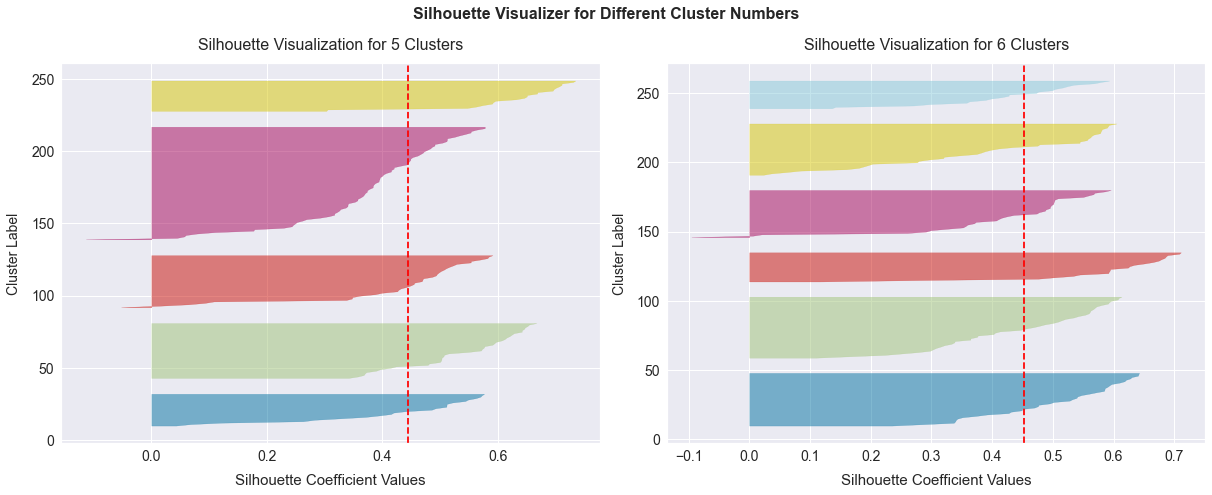

In [27]:
# Plot the silhouette visualizer to visualize clusters

# Set the style and font for the plot
sns.set_style('darkgrid')

# Set the figure size for the plot
fig, ax = plt.subplots(1, 2, figsize=(17, 7))

# Iterate over cluster numbers and corresponding subplots
for i, ax in zip([5, 6], ax):
    # Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax)
    
    # Fit the visualizer
    visualizer.fit(customer_df_final)
    
    # Set title and labels
    ax.set_title(f"Silhouette Visualization for {i} Clusters", fontsize=16, y=1.02)
    ax.set_xlabel("Silhouette Coefficient Values", labelpad=10, fontsize=15)
    ax.set_ylabel("Cluster Label", labelpad=10, fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=14)

# Set overall title for the figure
fig.suptitle("Silhouette Visualizer for Different Cluster Numbers", fontweight='bold', fontsize=16)

# Show the adjusted subplots
plt.tight_layout()
plt.show()

### EVALUATION AND ANALYZING OF THE K-MEANS CLUSTERS

### VISUALIZING THE DISTRIBUTION OF THE 5 CLUSTERS IN K-MEANS

- The distinct clusters indicate that mall customers exhibit varying patterns of behavior and preferences. This segmentation allows the mall to categorize customers into groups with shared characteristics, enabling personalized and targeted marketing strategies.


- Based on the pie chart, Cluster 0 has the highest proportion of 39.5%, indicating that a majority of the mall's customers belong to this cluster, sharing common behaviors or characteristics. Clusters 1 and 2 have similar proportions (18.5% and 19.5%), also implying that they may capture similar trends or patterns in the data. However, their specific characteristics might differ. Clusters 3 and 4 have smaller proportions, suggesting that they might represent smaller, specific subgroups of mall customers, representing 11.5% and 11% of the data respectively, and contributes the least to the number of mall customers.


- By tailoring offerings and experiences to specific clusters, the mall can optimize store layouts, introduce customized events, and make informed operational decisions. This customer-centric approach would then enhance overall satisfaction and foster customer engagement.


- The insights derived from the pie chart provide an overview of the different clusters' sizes and proportions. However, further analysis will be done to understand the distinct characteristics and patterns represented by each cluster.

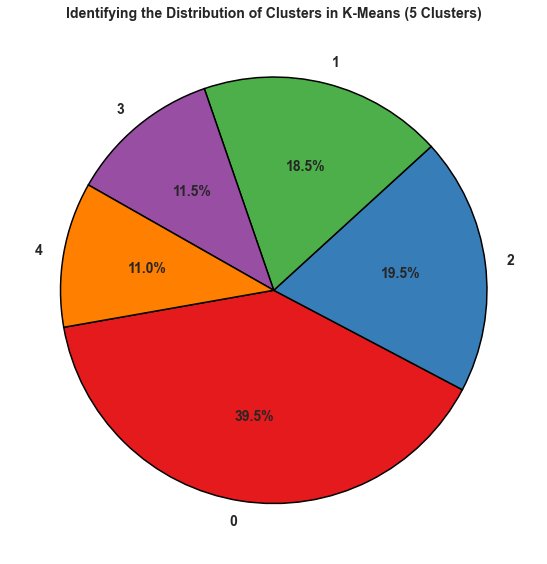

In [29]:
# Visualizing the distribution of the clusters in K-Means

# Set the style of the plot to darkgrid
sns.set_style('darkgrid')

# Create KMeans instance with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=21, n_init=10, init='k-means++')
kmeans.fit(customer_df_final)
cluster_labels = kmeans.predict(customer_df_final)

# Calculate the count of data points in each cluster
cluster_counts = pd.Series(cluster_labels).value_counts()

# Create a pie chart
plt.figure(figsize=(12, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct=lambda p: '{:.1f}%'.format(p), startangle=190, colors=plt.cm.Set1.colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},  textprops={'fontsize': 14, 'fontweight':'bold'})
plt.title("Identifying the Distribution of Clusters in K-Means (5 Clusters)", fontsize=14, fontweight='bold')

# Display the pie chart
plt.tight_layout()
plt.show()

### OBTAINING THE MEAN VALUE OF EACH FEATURE IN THE CLUSTER PROFILE

- Cluster 0 : Cluster 0 consists of customers with an average age of approximately 43 years. Their average income is around 54,823 dollars, indicating a moderate spending capacity. These customers tend to spend significantly on shopping, with an average spending score of 49/100. Moreover, a considerable portion of Cluster 0 customers are male (41.77%). This suggests that this segment comprises middle-aged male shoppers who exhibit a balanced spending pattern, making them potential targets for promotions and loyalty programs.


- Cluster 1 : Cluster 1 comprises customers with an average age of around 40 years. Their average income is notably higher at approximately 87,432 dollars, indicating a relatively higher spending capacity. However, the average spending score is comparatively lower at 18/100 only. This cluster shows a relatively balanced gender distribution, with around 51.35% being male. These characteristics suggest that Cluster 1 represents middle-aged customers with relatively higher income levels but more conservative spending habits to reduce spending levels. Targeted marketing strategies can encourage them to explore more shopping opportunities within the mall.


- Cluster 2 : Cluster 2 is characterized by customers with a lower average age of about 32 years. They also have a relatively high average income of around 86,538 dollars. This segment stands out for its significantly higher spending behavior, with an average spending score of 82/100, indicating they spend more at the mall. Furthermore, 46.15% of Cluster 2 customers are male. This group represents young and affluent shoppers who are enthusiastic about spending, making them valuable targets for exclusive events, luxury brands, and premium offerings.


- Cluster 3 : Cluster 3 consists of customers with a relatively higher average age of approximately 45 years. Their average income is modest at around 26,304 dollars, resulting in a lower average spending score of only 20/100. About 39.13% of Cluster 3 customers are male. This cluster represents mature shoppers with lower spending tendencies. Tailored promotions, discounts, and campaigns emphasizing value for money could attract and retain this customer segment.


- Cluster 4 : Cluster 4 stands out with the youngest average age of customers, approximately 25 years. The average income is relatively lower at around 25,727 dollars. but these customers exhibit a substantially high average spending score of 79/100. Around 40.91% of Cluster 4 customers are male. This group represents young and high-spending individuals, likely attracted to trendy and fashionable offerings. The mall can capitalize on their willingness to spend by introducing youth-oriented brands and vibrant shopping experiences.

In [30]:
# Obtain the mean value of each feature (age, income, amount spent, gender) for each cluster

# Calculate cluster profiles: mean values of features within each cluster
cluster_profiles = customer_df_final.groupby(cluster_labels).mean()

# Add a new column with cluster numbers
cluster_profiles.insert(0, 'Cluster Number', ['Cluster ' + str(cluster) for cluster in cluster_profiles.index])

# Display the cluster profiles table
print("Cluster Profiles - Mean Values of Features by Cluster:")
cluster_profiles

Cluster Profiles - Mean Values of Features by Cluster:


,Cluster Number,Age,Income (k$),Spending Score (1-100),Gender_Male
0,Cluster 0,43.126582,54.822785,49.835443,0.417722
1,Cluster 1,40.324324,87.432432,18.189189,0.513514
2,Cluster 2,32.692308,86.538462,82.128205,0.461538
3,Cluster 3,45.217391,26.304348,20.913043,0.391304
4,Cluster 4,25.272727,25.727273,79.363636,0.409091


### PROFILING OF THE CUSTOMER CLUSTERS BY CLUSTER GROUPS

- Cluster 0: This cluster encompasses a small range of income levels, indicating a heterogeneous mix of customers with similar financial capabilities and the difference in income levels do not differ too much. Their spending score similarly reflect their  income level, as spending score is around 40-60/100, possibly indicating that this group of customers do not spend extravagantly and are more budget-conscious. Age distribution within Cluster 0 is notably wide, suggesting a mix of generations, and gender distribution is evenly spread.


- Cluster 1: Customers in this cluster have moderate income levels (higher than cluster 0), reflecting a balanced financial standing. But, their spending score does not align with this balance, showcasing low spending behavior due to low spending scores. And, their spending score is considerably lower compared to customers from Cluster 0, suggesting that this group of customers prefer to stay savvy and reduce shopping expenditure, hence they have a lower spending score. The age range is relatively focused, indicating a specific target age group of around 35-48 years. Interestingly, Cluster 1 has a higher proportion of male customers, highlighting that male customers are typically more conservative when spending and prefer to save their income earned.


- Cluster 2: This segment comprises affluent customers with relatively higher income levels. Their spending scores are notably higher, close to 100/100, reflecting a willingness to invest in shopping. The age range is narrower in the 30s, indicating a specific age group with relatively higher purchasing power. However, there is a larger proportion of females in this customer segment, indicating that females tend to spend more than males when shopping and have more expenditure allowances.


- Cluster 3: Customers in this cluster have much lower average incomes, suggesting a more budget-conscious segment. Their spending score is rather low or moderate, indicating a careful approach to shopping and does not spend much on shopping trips. Age distribution varies across different age groups, and there is no significant gender bias within this cluster.


- Cluster 4: Similar to Cluster 3, this segment has lower average incomes, emphasizing budget-conscious behavior. Despite this, customers in Cluster 4 have much higher spending scores, indicating that this group of customers spend more than they earn. The age range is narrower, of around 20-30 years, suggesting that younger people tend to spend more on shopping and make more purchases compared to other age groups, hence are rewarded with a higher spending score. It is also evident that there are more females than males in this category, hence supporting the high spending habit score and purchasing habits.

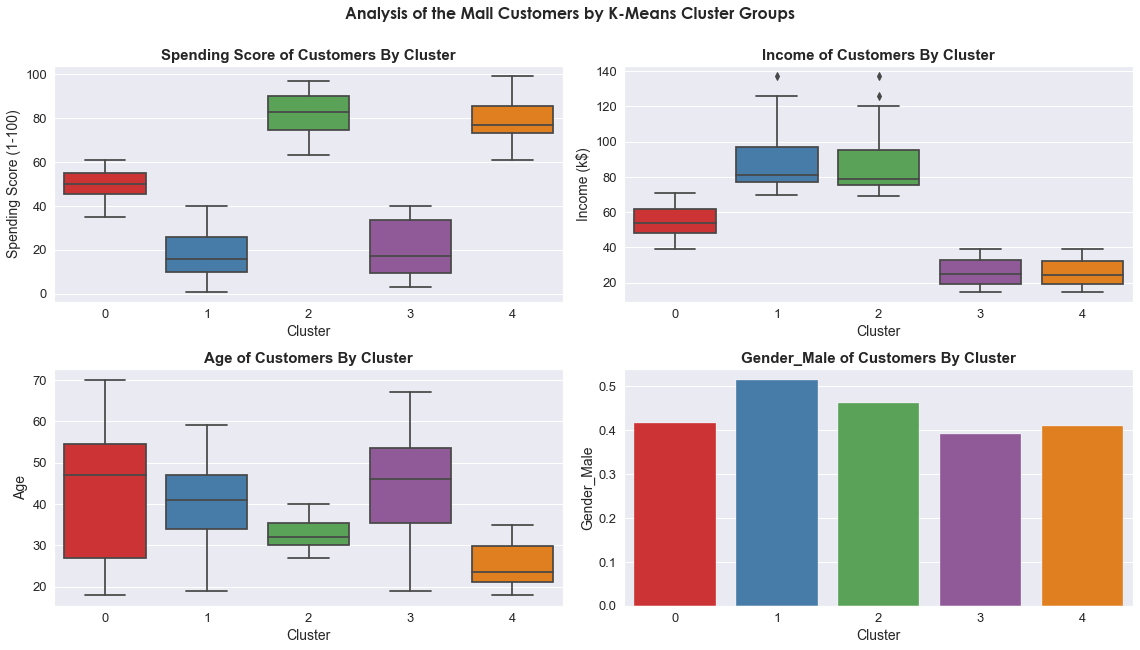

In [31]:
# Use barplots to determine the age, spending, income, and gender of customers according to cluster

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(16, 9))
plt.rcParams['font.family'] = 'Century Gothic'

# Flatten the axes array to make indexing easier
axes = axes.flatten()

# Define the attributes and their corresponding titles
attributes = ["Spending Score (1-100)", "Income (k$)", "Age", 'Gender_Male']
titles = ["Spending Score of Customers By Cluster", "Income of Customers By Cluster", "Age of Customers By Cluster", "Gender_Male of Customers By Cluster"]

# Loop through the attributes and generate the barplots
for idx, (attr, title) in enumerate(zip(attributes, titles)):
    if attr=='Gender_Male':
        sns.barplot(x=cluster_labels, y=customer_df_final[attr], palette='Set1', ax=axes[idx], ci=False)
    else:
        sns.boxplot(x=cluster_labels, y=customer_df_final[attr], palette='Set1', ax=axes[idx])
    axes[idx].set_title(title, fontsize=15, fontweight='semibold')
    axes[idx].set_xlabel('Cluster', fontsize=14)
    axes[idx].set_ylabel(attr, fontsize=14)
    
    # Increase tick size for x and y axes
    axes[idx].tick_params(axis='x', labelsize=13)
    axes[idx].tick_params(axis='y', labelsize=13)

# Add a super title for the entire subplot layout
plt.suptitle("Analysis of the Mall Customers by K-Means Cluster Groups", y=1.001, fontweight='bold', fontsize=16)

# Adjust layout spacing and displaying the plots
plt.tight_layout()
plt.show()

### CONCLUSIONS GAINED FROM THE CLUSTERING ANALYSIS

#### WHICH IS THE BEST CLUSTERING MODEL AND BEST POSSIBLE VALUE OF K?

- Best Clustering Model : K-Means Clustering Algorithm
- Best Possible Value of K : 5 (Provides more distinct and well-separated clusters)

#### ANALYSIS OF THE CUSTOMER CLUSTERS

- Cluster 0: Cluster 0 comprises middle-aged customers, around 43 years old, with a moderate average income of approximately 54,823 dollars. Their spending score aligns with their income, as they tend to spend reasonably on shopping, with an average spending score of 49/100. This cluster consists of both male and female customers, indicating a balanced gender distribution. These middle-aged shoppers exhibit a balanced spending pattern, making them potential targets for tailored promotions and loyalty programs.


- Cluster 1: Customers in Cluster 1 are middle-aged, with an average age of about 40 years, and enjoy a relatively higher average income of around 87,432 dollars. Despite their higher income, their spending habits are much more conservative, with a low spending score of only 18/100 - indicating that this group of customers do not spend much on shopping expenses. The cluster has a fairly even distribution of male and female customers, reflecting a balanced gender representation. This segment represents customers with a balanced financial standing, and marketing strategies can encourage them to explore more shopping opportunities within the mall.


- Cluster 2: Cluster 2 stands out with its young and affluent shoppers, averaging around 32 years old and having a relatively high average income of about 86,538 dollars. These customers display a high willingness to spend, with a high spending score of 82/100. The gender distribution is skewed towards females, with 46.15% being female customers. This group represents enthusiastic spenders who are drawn to premium offerings, making them valuable targets for luxury brands and exclusive events.


- Cluster 3: Customers in Cluster 3 are relatively mature, around 45 years old, with a modest average income of approximately 26,304 dollars. Their spending habits are more conservative, with an average spending score of only 20/100. The cluster has a moderate representation of male customers, around 39.13%. This segment represents a more budget-conscious group of shoppers who seek value for money. Tailored promotions and discounts could resonate well with this customer segment.


- Cluster 4: Cluster 4 consists of the youngest customers, with an average age of approximately 25 years, and their average income is relatively lower at around 25,727 dollars. However, they exhibit a significantly higher spending tendency, with an relatively high spending score of 79/100. The cluster has a substantial representation of male customers, about 40.91%. These young and high-spending individuals are attracted to trendy and fashionable offerings, making them an ideal target for youth-oriented brands and vibrant shopping experiences.

#### WHICH GROUP OF CUSTOMER IS THE MOST VALUABLE TO THE SHOPPING MALL?

#### CLUSTER 2 IS THE MOST VALUABLE : AFFLUENT SHOPPING ENTHUSIASTS

Based on the insights gathered from the customer clusters, **Cluster 2** appears to be the most valuable to the shopping mall. 


This cluster consists of young and affluent shoppers with a relatively higher average income, enthusiastic spending behavior, and a preference for premium offerings. Their willingness to spend and higher income levels indicate a strong potential for generating substantial revenue for the mall. This can be seen from their high spending scores, with customers in this cluster making more extravagant purchases and contribute more sales to the shops found in the mall. Moreover, the skewed gender distribution towards females within this cluster suggests that they are more likely to engage in shopping activities, further enhancing their value to the mall. 

By targeting and catering to the preferences of Cluster 2 customers, the shopping mall can capitalize on their spending habits and effectively drive sales, thereby contributing significantly to the mall's overall success and profitability.